In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%capture
!pip install fairlearn

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, f1_score

from fairlearn.postprocessing import ThresholdOptimizer
from fairlearn.preprocessing import CorrelationRemover
from fairlearn.adversarial import AdversarialFairnessClassifier
from fairlearn.metrics import MetricFrame
import fairlearn.datasets as fdata
from fairlearn.metrics import (demographic_parity_difference, demographic_parity_ratio, 
                               selection_rate_difference, false_negative_rate_difference, 
                               false_positive_rate_difference, equalized_odds_ratio,
                               false_negative_rate, false_positive_rate)

In [ ]:
df_all = pd.read_csv('/content/drive/MyDrive/1017 Project (Spring 2023)/Data/all_data.csv')
df_hat_all = pd.read_csv('/content/drive/MyDrive/1017 Project (Spring 2023)/Data/lstm_5_targets.csv')

In [ ]:
df_test = df_all[df_all['split']=='test']
y_hat = df_hat_all[['id', 'target_0']]

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194641 entries, 3 to 1999509
Data columns (total 46 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   id                                   194641 non-null  int64  
 1   comment_text                         194641 non-null  object 
 2   split                                194641 non-null  object 
 3   created_date                         194641 non-null  object 
 4   publication_id                       194641 non-null  int64  
 5   parent_id                            108480 non-null  float64
 6   article_id                           194641 non-null  int64  
 7   rating                               194641 non-null  object 
 8   funny                                194641 non-null  int64  
 9   wow                                  194641 non-null  int64  
 10  sad                                  194641 non-null  int64  
 11  likes       

In [ ]:
y_hat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194640 entries, 0 to 194639
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        194640 non-null  int64  
 1   target_0  194640 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 3.0 MB


In [ ]:
# Found 1 mismatch record, fixing it through inner join
df_test = pd.merge(df_test, y_hat, how="inner", on="id")

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194640 entries, 0 to 194639
Data columns (total 47 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   id                                   194640 non-null  int64  
 1   comment_text                         194640 non-null  object 
 2   split                                194640 non-null  object 
 3   created_date                         194640 non-null  object 
 4   publication_id                       194640 non-null  int64  
 5   parent_id                            108480 non-null  float64
 6   article_id                           194640 non-null  int64  
 7   rating                               194640 non-null  object 
 8   funny                                194640 non-null  int64  
 9   wow                                  194640 non-null  int64  
 10  sad                                  194640 non-null  int64  
 11  likes        

In [ ]:
# Impute all missing values with 0
df_test = df_test.drop(columns=['parent_id', 'created_date', 'publication_id', 'article_id', 'rating', 'funny', 'wow', 'sad', 'likes', 'disagree'])
df_test = df_test.dropna()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42870 entries, 748 to 194639
Data columns (total 37 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   42870 non-null  int64  
 1   comment_text                         42870 non-null  object 
 2   split                                42870 non-null  object 
 3   toxicity                             42870 non-null  float64
 4   severe_toxicity                      42870 non-null  float64
 5   obscene                              42870 non-null  float64
 6   sexual_explicit                      42870 non-null  float64
 7   identity_attack                      42870 non-null  float64
 8   insult                               42870 non-null  float64
 9   threat                               42870 non-null  float64
 10  male                                 42870 non-null  float64
 11  female                   

In [ ]:
y_true=[1 if x>=0.5 else 0 for x in df_test['toxicity']]
y_pred=[1 if x>=0.5 else 0 for x in df_test['target_0']]

# Overall Performance

In [ ]:
accuracy_score(y_true, y_pred)

0.9347095871238629

In [ ]:
precision_score(y_true, y_pred)

0.8020961775585697

In [ ]:
recall_score(y_true, y_pred)

0.5467535196469847

In [ ]:
f1_score(y_true, y_pred)

0.6502561539422717

# Performence and fairness across subgroups

# Gender

male vs other


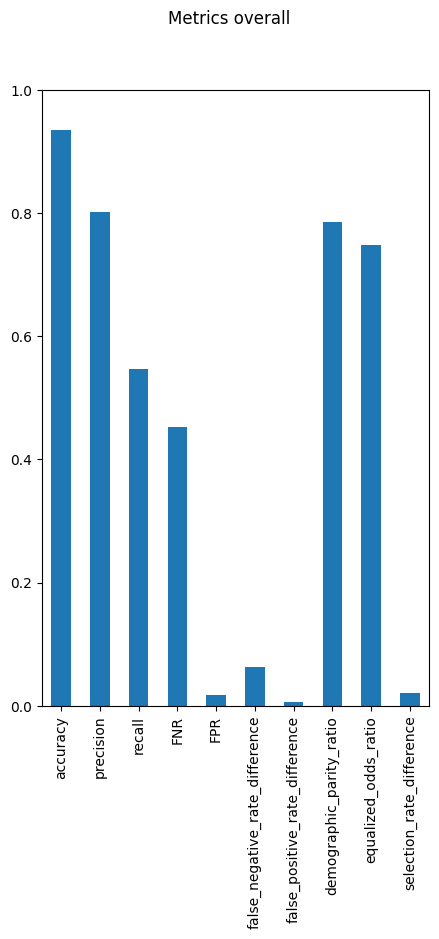

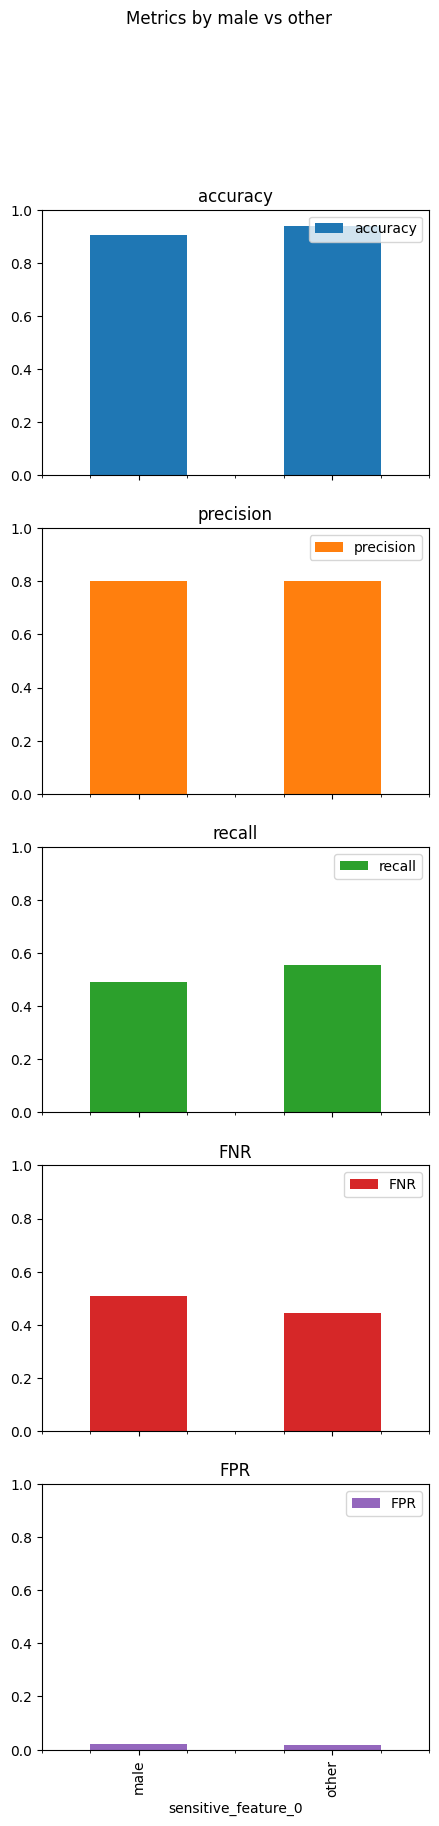

<ipython-input-18-238b5ab68303>:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_gender_fairness = df_gender_fairness.append(fairness_metrics, ignore_index=True)


accuracy                          0.934710
precision                         0.802096
recall                            0.546754
FNR                               0.453246
FPR                               0.016846
false_negative_rate_difference    0.063100
false_positive_rate_difference    0.005487
demographic_parity_ratio          0.785585
equalized_odds_ratio              0.748270
selection_rate_difference         0.020092
dtype: float64
                     accuracy  precision    recall       FNR       FPR
sensitive_feature_0                                                   
male                 0.904013   0.802920  0.492537  0.507463  0.021798
other                0.938208   0.801977  0.555637  0.444363  0.016311
----------------------------------------------------------------------------------------
female vs other


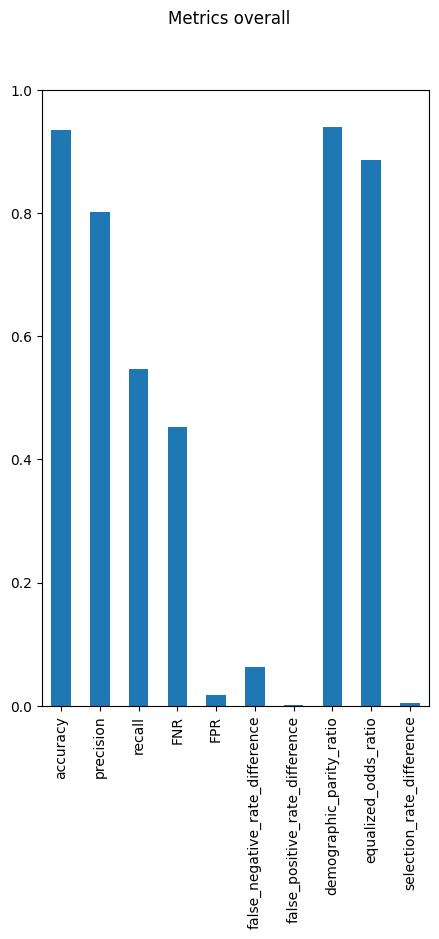

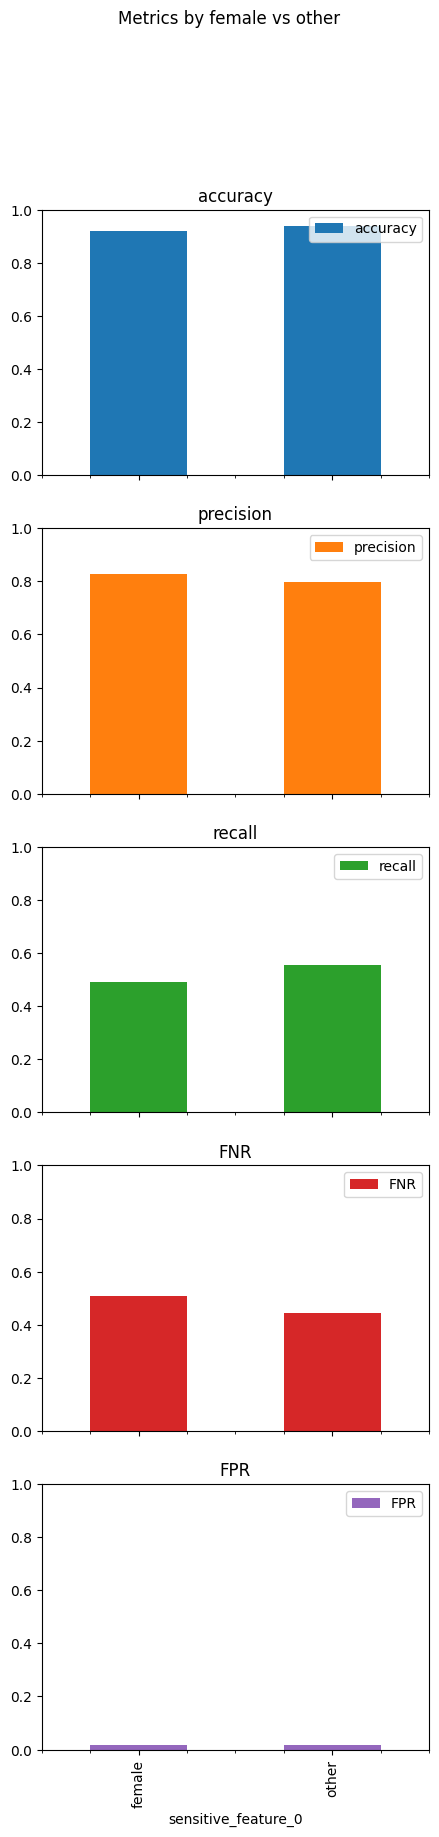

<ipython-input-18-238b5ab68303>:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_gender_fairness = df_gender_fairness.append(fairness_metrics, ignore_index=True)


accuracy                          0.934710
precision                         0.802096
recall                            0.546754
FNR                               0.453246
FPR                               0.016846
false_negative_rate_difference    0.063163
false_positive_rate_difference    0.001061
demographic_parity_ratio          0.939530
equalized_odds_ratio              0.886384
selection_rate_difference         0.004833
dtype: float64
                     accuracy  precision    recall       FNR       FPR
sensitive_feature_0                                                   
female               0.918138   0.827670  0.492775  0.507225  0.015909
other                0.936975   0.798376  0.555938  0.444062  0.016970
----------------------------------------------------------------------------------------
transgender vs other


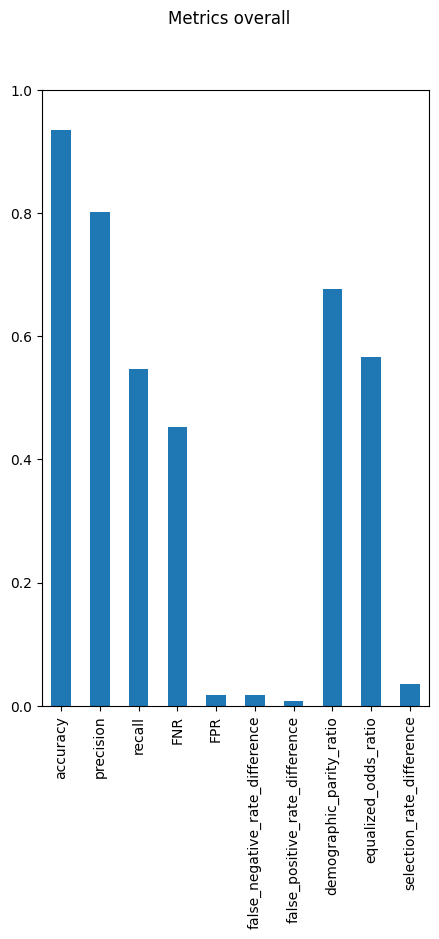

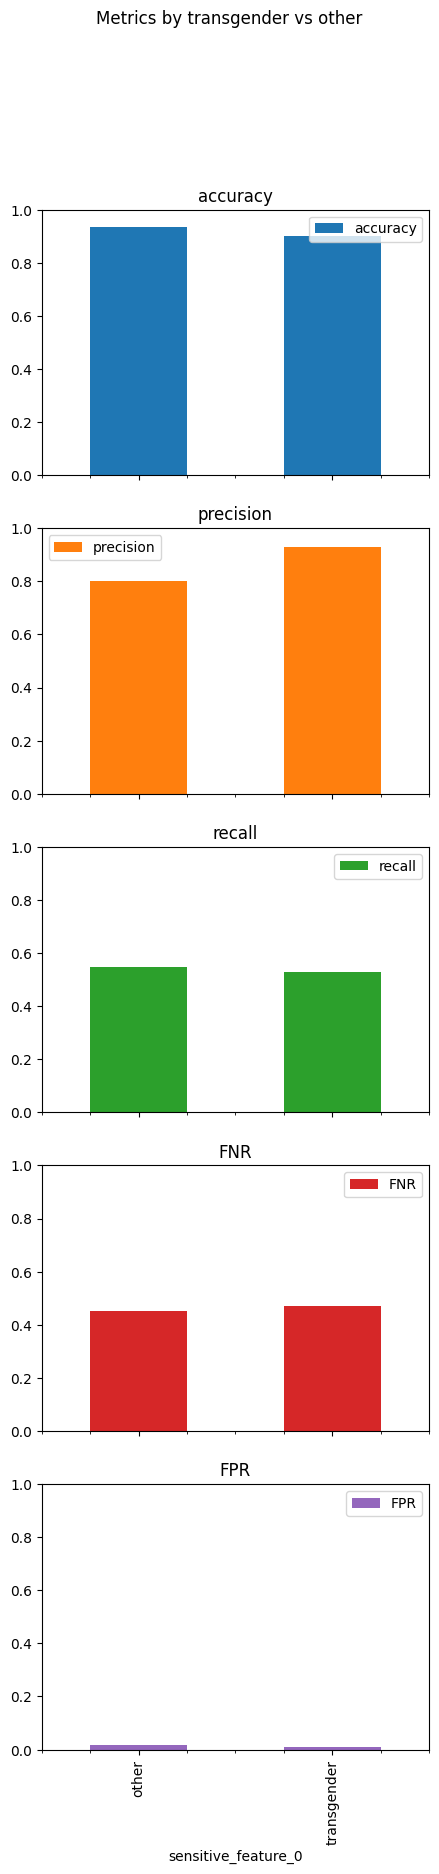

accuracy                          0.934710
precision                         0.802096
recall                            0.546754
FNR                               0.453246
FPR                               0.016846
false_negative_rate_difference    0.017530
false_positive_rate_difference    0.007316
demographic_parity_ratio          0.676464
equalized_odds_ratio              0.566717
selection_rate_difference         0.036087
dtype: float64
                     accuracy  precision    recall       FNR       FPR
sensitive_feature_0                                                   
other                0.934921   0.800933  0.546941  0.453059  0.016886
transgender          0.900000   0.931034  0.529412  0.470588  0.009569
----------------------------------------------------------------------------------------


<ipython-input-18-238b5ab68303>:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_gender_fairness = df_gender_fairness.append(fairness_metrics, ignore_index=True)


In [ ]:
# 'other_gender' is not included because no comment has label 'other_gender'
gender = ['male', 'female', 'transgender']
df_gender_counts = pd.DataFrame(columns=['counts'], index=['male', 'female', 'transgender'])
df_gender_accuracy = pd.DataFrame(columns=["sensitive_feature_0", "accuracy", "precision", "recall", "FNR", "FPR"])
df_gender_fairness = pd.DataFrame(columns=["sensitive_feature", "false_negative_rate_difference", "false_positive_rate_difference", "demographic_parity_ratio", "equalized_odds_ratio", "selection_rate_difference"])
# counts_gender = {}

for e in gender:
  print('{} vs other'.format(e))
  feature_array = np.array([1 if x>= 0.5 else 0 for x in df_test[e]])
  # counts_gender=sum(feature_array)
  df_gender_counts.loc[e, 'counts'] = str(sum(feature_array)) + '(' + str(round((sum(feature_array)/42870)*100, 2)) + '%)'
  sensitive_feature = [e if x==1 else 'other' for x in feature_array]

  metrics = {'accuracy': accuracy_score,
            'precision': precision_score, 
            'recall': recall_score,
            'FNR': false_negative_rate,
            'FPR': false_positive_rate, 
            'false_negative_rate_difference': false_negative_rate_difference, 
            'false_positive_rate_difference': false_positive_rate_difference,
            'demographic_parity_ratio': demographic_parity_ratio,
            'equalized_odds_ratio': equalized_odds_ratio,
            'selection_rate_difference': selection_rate_difference}

  extra_params = {
  'false_negative_rate_difference': {'sensitive_features': sensitive_feature},
  'false_positive_rate_difference': {'sensitive_features': sensitive_feature},
  'demographic_parity_ratio': {'sensitive_features': sensitive_feature},
  'equalized_odds_ratio': {'sensitive_features': sensitive_feature},
  'selection_rate_difference': {'sensitive_features': sensitive_feature}
  }

  grouped_on_e = MetricFrame(metrics=metrics,
                              y_true=y_true,
                              y_pred=y_pred,
                              sensitive_features=sensitive_feature,
                              sample_params=extra_params)

  grouped_on_e.overall.plot.bar(
      subplots=True, 
      figsize=(5, 8), 
      ylim=[0,1],
      title="Metrics overall",
      )
  plt.show()

  grouped_on_e.by_group[["accuracy", "precision", "recall", "FNR", "FPR"]].plot.bar(
      subplots=True, 
      figsize=(5, 20), 
      ylim=[0,1],
      title="Metrics by {} vs other".format(e),
      )
  plt.show()

  df = grouped_on_e.by_group[["accuracy", "precision", "recall", "FNR", "FPR"]]
  df = df.reset_index()
  df_gender_accuracy = pd.concat([df_gender_accuracy, df[df['sensitive_feature_0']==e]])

  fairness_metrics = {"sensitive_feature": e}
  for f in ["false_negative_rate_difference", "false_positive_rate_difference", "demographic_parity_ratio", "equalized_odds_ratio", "selection_rate_difference"]:
    fairness_metrics[f] = grouped_on_e.overall[f]

  df_gender_fairness = df_gender_fairness.append(fairness_metrics, ignore_index=True)

  print(grouped_on_e.overall)
  print(grouped_on_e.by_group[["accuracy", "precision", "recall", "FNR", "FPR"]])
  print('----------------------------------------------------------------------------------------')

In [ ]:
df_gender_counts.loc['other_gender', 'counts'] = '0(0.00%)'
df_gender_counts

,counts
male,4386(10.23%)
female,5155(12.02%)
transgender,260(0.61%)
other_gender,0(0.00%)


In [ ]:
df_gender_accuracy.rename(columns={'sensitive_feature_0': 'sensitive_feature'})

,sensitive_feature,accuracy,precision,recall,FNR,FPR
0,male,0.904013,0.802920,0.492537,0.507463,0.021798
0,female,0.918138,0.827670,0.492775,0.507225,0.015909
1,transgender,0.900000,0.931034,0.529412,0.470588,0.009569


In [ ]:
df_gender_fairness.rename(columns={'sensitive_feature_0': 'sensitive_feature', 'false_negative_rate_difference': 'FNR_difference', 'false_positive_rate_difference': 'FPR_difference'})

,sensitive_feature,FNR_difference,FPR_difference,demographic_parity_ratio,equalized_odds_ratio,selection_rate_difference
0,male,0.063100,0.005487,0.785585,0.748270,0.020092
1,female,0.063163,0.001061,0.939530,0.886384,0.004833
2,transgender,0.017530,0.007316,0.676464,0.566717,0.036087


# Sex Orientation

heterosexual vs other


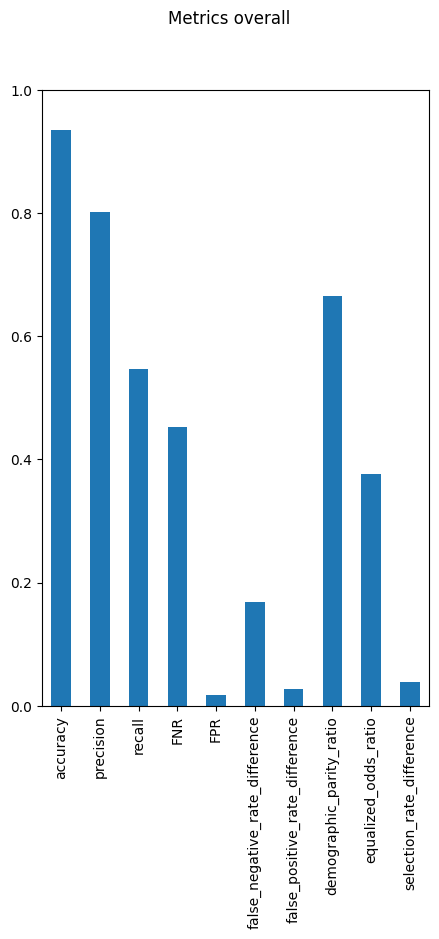

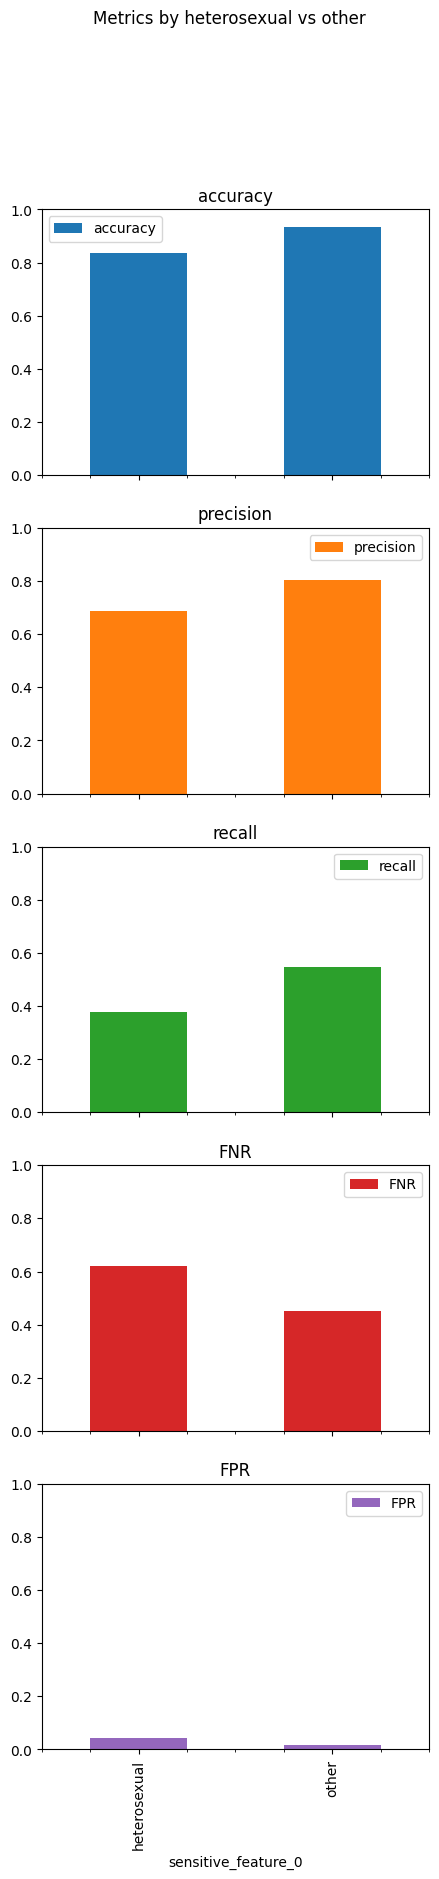

<ipython-input-20-c3b2dfc3fe2a>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sex_orientation_fairness = df_sex_orientation_fairness.append(fairness_metrics, ignore_index=True)


accuracy                          0.934710
precision                         0.802096
recall                            0.546754
FNR                               0.453246
FPR                               0.016846
false_negative_rate_difference    0.168470
false_positive_rate_difference    0.027879
demographic_parity_ratio          0.665748
equalized_odds_ratio              0.375505
selection_rate_difference         0.037929
dtype: float64
                     accuracy  precision   recall      FNR       FPR
sensitive_feature_0                                                 
heterosexual         0.836879   0.687500  0.37931  0.62069  0.044643
other                0.935032   0.802664  0.54778  0.45222  0.016764
----------------------------------------------------------------------------------------
homosexual_gay_or_lesbian vs other


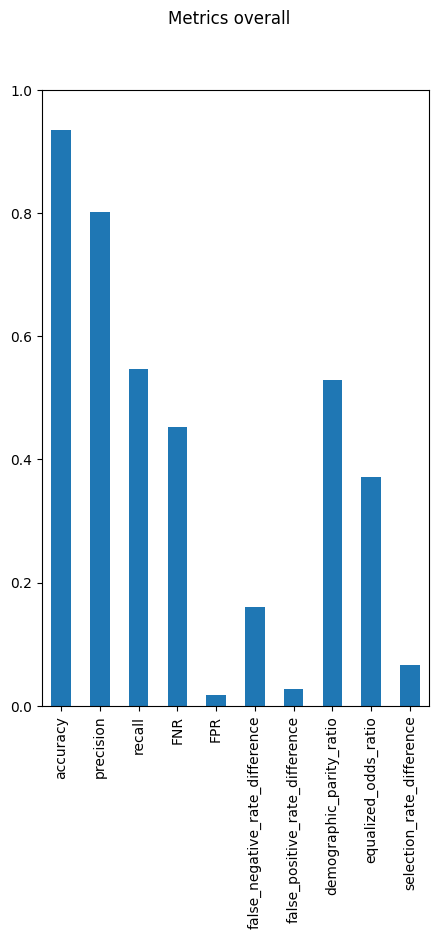

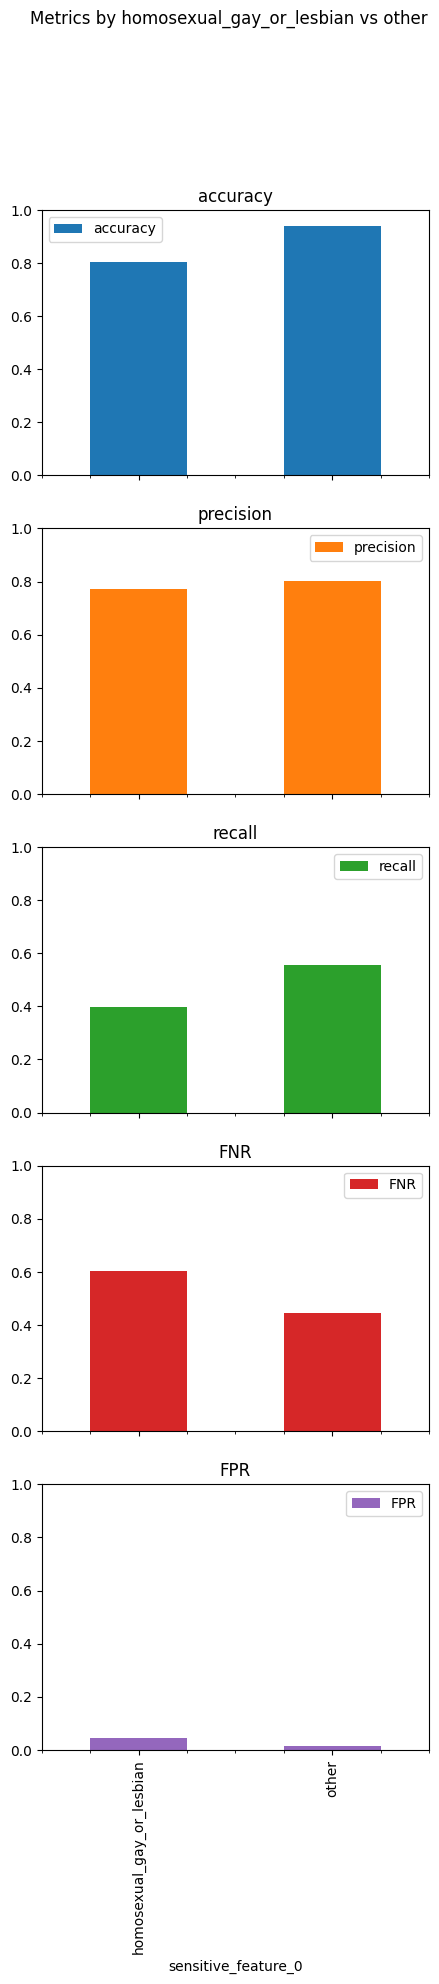

<ipython-input-20-c3b2dfc3fe2a>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sex_orientation_fairness = df_sex_orientation_fairness.append(fairness_metrics, ignore_index=True)


accuracy                          0.934710
precision                         0.802096
recall                            0.546754
FNR                               0.453246
FPR                               0.016846
false_negative_rate_difference    0.159949
false_positive_rate_difference    0.027586
demographic_parity_ratio          0.529171
equalized_odds_ratio              0.371192
selection_rate_difference         0.065872
dtype: float64
                           accuracy  precision    recall       FNR       FPR
sensitive_feature_0                                                         
homosexual_gay_or_lesbian  0.803756   0.771812  0.396552  0.603448  0.043871
other                      0.938046   0.803554  0.556500  0.443500  0.016285
----------------------------------------------------------------------------------------
bisexual vs other


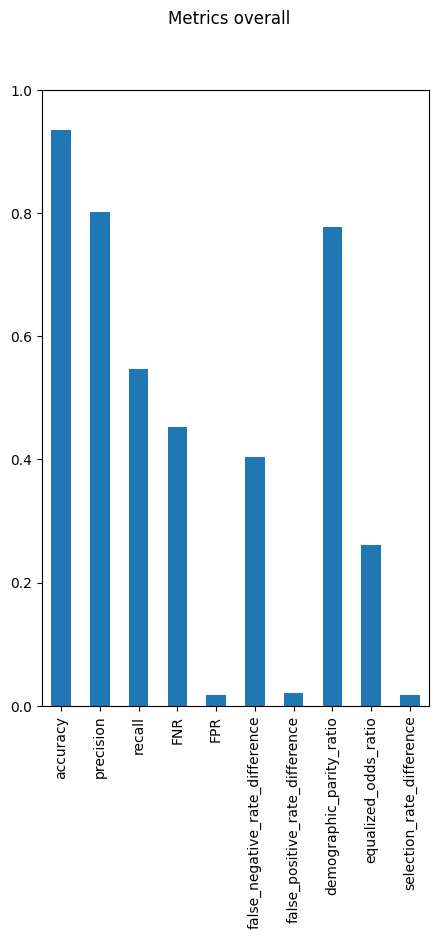

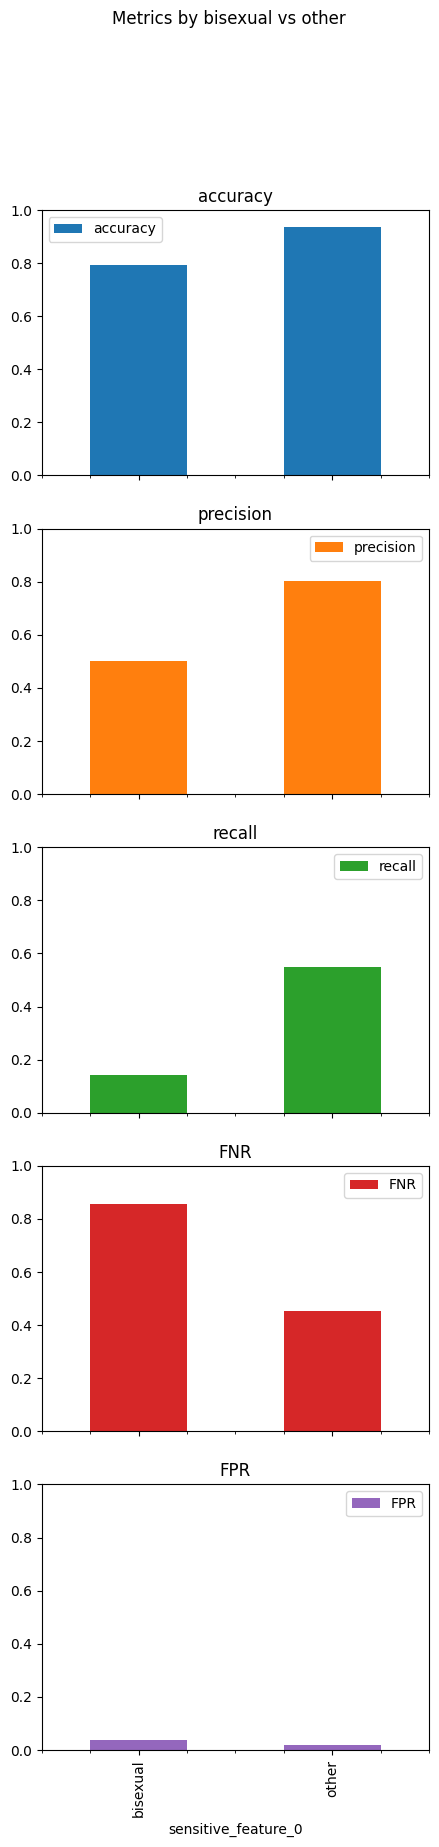

accuracy                          0.934710
precision                         0.802096
recall                            0.546754
FNR                               0.453246
FPR                               0.016846
false_negative_rate_difference    0.404491
false_positive_rate_difference    0.020206
demographic_parity_ratio          0.777225
equalized_odds_ratio              0.260999
selection_rate_difference         0.016860
dtype: float64
                     accuracy  precision    recall       FNR       FPR
sensitive_feature_0                                                   
bisexual             0.794118   0.500000  0.142857  0.857143  0.037037
other                0.934821   0.802283  0.547348  0.452652  0.016831
----------------------------------------------------------------------------------------


<ipython-input-20-c3b2dfc3fe2a>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sex_orientation_fairness = df_sex_orientation_fairness.append(fairness_metrics, ignore_index=True)


In [ ]:
sex_orientation = ['heterosexual', 'homosexual_gay_or_lesbian', 'bisexual']
df_sex_orientation_counts = pd.DataFrame(columns=['counts'], index=['heterosexual', 'homosexual_gay_or_lesbian', 'bisexual'])
df_sex_orientation_accuracy = pd.DataFrame(columns=["sensitive_feature_0", "accuracy", "precision", "recall", "FNR", "FPR"])
df_sex_orientation_fairness = pd.DataFrame(columns=["sensitive_feature", "false_negative_rate_difference", "false_positive_rate_difference", "demographic_parity_ratio", "equalized_odds_ratio", "selection_rate_difference"])

for e in sex_orientation:
  print('{} vs other'.format(e))
  feature_array = np.array([1 if x>= 0.5 else 0 for x in df_test[e]])
  df_sex_orientation_counts.loc[e, 'counts'] = str(sum(feature_array)) + '(' + str(round((sum(feature_array)/42870)*100, 2)) + '%)'
  sensitive_feature = [e if x==1 else 'other' for x in feature_array]

  metrics = {'accuracy': accuracy_score,
            'precision': precision_score, 
            'recall': recall_score,
            'FNR': false_negative_rate,
            'FPR': false_positive_rate, 
            'false_negative_rate_difference': false_negative_rate_difference, 
            'false_positive_rate_difference': false_positive_rate_difference,
            'demographic_parity_ratio': demographic_parity_ratio,
            'equalized_odds_ratio': equalized_odds_ratio,
            'selection_rate_difference': selection_rate_difference}

  extra_params = {
  'false_negative_rate_difference': {'sensitive_features': sensitive_feature},
  'false_positive_rate_difference': {'sensitive_features': sensitive_feature},
  'demographic_parity_ratio': {'sensitive_features': sensitive_feature},
  'equalized_odds_ratio': {'sensitive_features': sensitive_feature},
  'selection_rate_difference': {'sensitive_features': sensitive_feature}
  }

  grouped_on_e = MetricFrame(metrics=metrics,
                              y_true=y_true,
                              y_pred=y_pred,
                              sensitive_features=sensitive_feature,
                              sample_params=extra_params)

  grouped_on_e.overall.plot.bar(
      subplots=True, 
      figsize=(5, 8), 
      ylim=[0,1],
      title="Metrics overall",
      )
  plt.show()

  grouped_on_e.by_group[["accuracy", "precision", "recall", "FNR", "FPR"]].plot.bar(
      subplots=True, 
      figsize=(5, 20), 
      ylim=[0,1],
      title="Metrics by {} vs other".format(e),
      )
  plt.show()

  df = grouped_on_e.by_group[["accuracy", "precision", "recall", "FNR", "FPR"]]
  df = df.reset_index()
  df_sex_orientation_accuracy = pd.concat([df_sex_orientation_accuracy, df[df['sensitive_feature_0']==e]])

  fairness_metrics = {"sensitive_feature": e}
  for f in ["false_negative_rate_difference", "false_positive_rate_difference", "demographic_parity_ratio", "equalized_odds_ratio", "selection_rate_difference"]:
    fairness_metrics[f] = grouped_on_e.overall[f]

  df_sex_orientation_fairness = df_sex_orientation_fairness.append(fairness_metrics, ignore_index=True)

  print(grouped_on_e.overall)
  print(grouped_on_e.by_group[["accuracy", "precision", "recall", "FNR", "FPR"]])
  print('----------------------------------------------------------------------------------------')

In [ ]:
# sensitive features: other_sexual_orientation vs other
# Setting up accuracy and fairness metrics
feature_array = np.array([1 if x>= 0.5 else 0 for x in df_test['other_sexual_orientation']])
sensitive_feature = ['other_sexual_orientation' if x==1 else 'other' for x in feature_array]
print(np.unique(sensitive_feature, return_counts=True))

(array(['other', 'other_sexual_orientation'], dtype='<U24'), array([42869,     1]))


In [ ]:
df_sex_orientation_counts.loc['other_sexual_orientation', 'counts'] = '1(0.00%)'
df_sex_orientation_counts

,counts
heterosexual,141(0.33%)
homosexual_gay_or_lesbian,1065(2.48%)
bisexual,34(0.08%)
other_sexual_orientation,1(0.00%)


In [ ]:
df_sex_orientation_accuracy.rename(columns={'sensitive_feature_0': 'sensitive_feature'})

,sensitive_feature,accuracy,precision,recall,FNR,FPR
0,heterosexual,0.836879,0.687500,0.379310,0.620690,0.044643
0,homosexual_gay_or_lesbian,0.803756,0.771812,0.396552,0.603448,0.043871
0,bisexual,0.794118,0.500000,0.142857,0.857143,0.037037


In [ ]:
df_sex_orientation_fairness.rename(columns={'sensitive_feature_0': 'sensitive_feature', 'false_negative_rate_difference': 'FNR_difference', 'false_positive_rate_difference': 'FPR_difference'})

,sensitive_feature,FNR_difference,FPR_difference,demographic_parity_ratio,equalized_odds_ratio,selection_rate_difference
0,heterosexual,0.168470,0.027879,0.665748,0.375505,0.037929
1,homosexual_gay_or_lesbian,0.159949,0.027586,0.529171,0.371192,0.065872
2,bisexual,0.404491,0.020206,0.777225,0.260999,0.016860


# Religion

28  christian                            42870 non-null   float64
 29  jewish                               42870 non-null   float64
 30  muslim                               42870 non-null   float64
 31  hindu                                42870 non-null   float64
 32  buddhist                             42870 non-null   float64
 33  atheist                              42870 non-null   float64
 34  other_religion

christian vs other


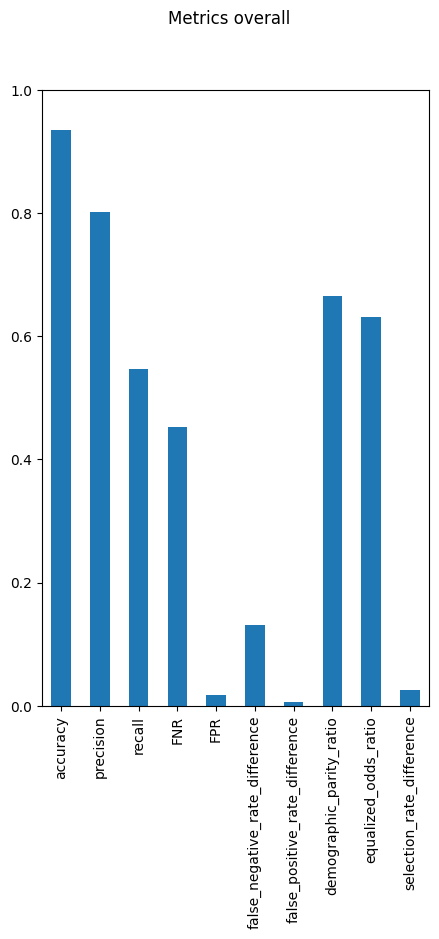

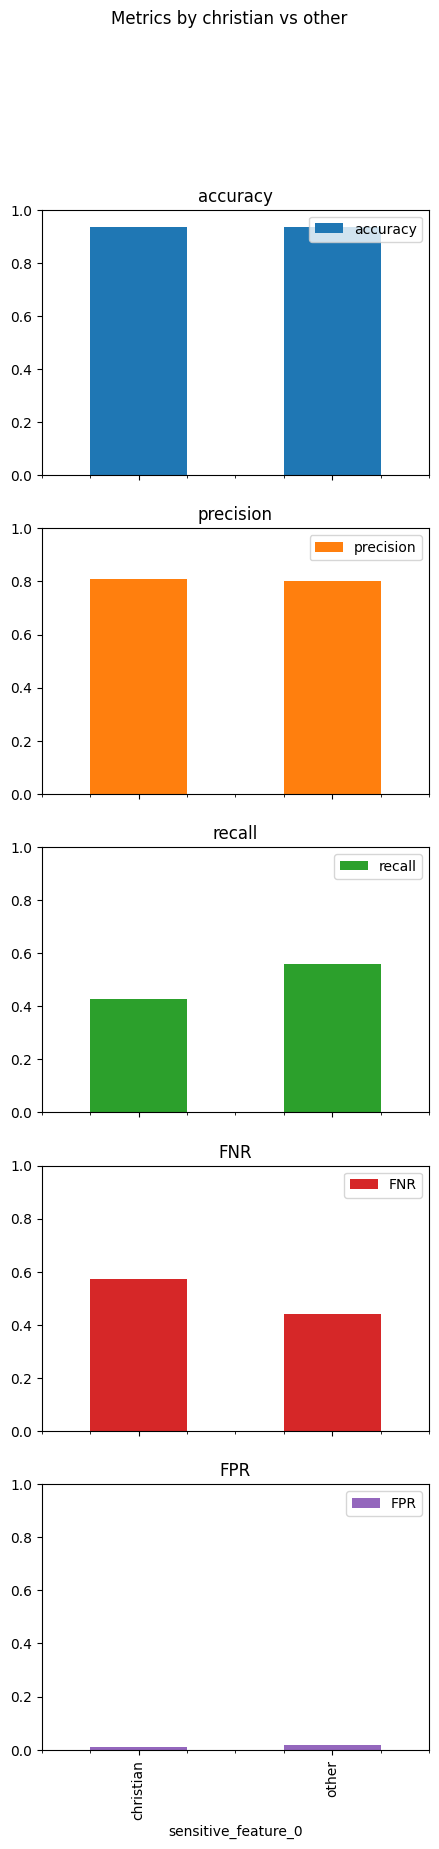

<ipython-input-23-d1f222872d97>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_religion_fairness = df_religion_fairness.append(fairness_metrics, ignore_index=True)


accuracy                          0.934710
precision                         0.802096
recall                            0.546754
FNR                               0.453246
FPR                               0.016846
false_negative_rate_difference    0.131410
false_positive_rate_difference    0.006465
demographic_parity_ratio          0.665263
equalized_odds_ratio              0.630386
selection_rate_difference         0.026194
dtype: float64
                     accuracy  precision    recall       FNR       FPR
sensitive_feature_0                                                   
christian            0.933507   0.809091  0.426859  0.573141  0.011027
other                0.934841   0.801587  0.558268  0.441732  0.017492
----------------------------------------------------------------------------------------
jewish vs other


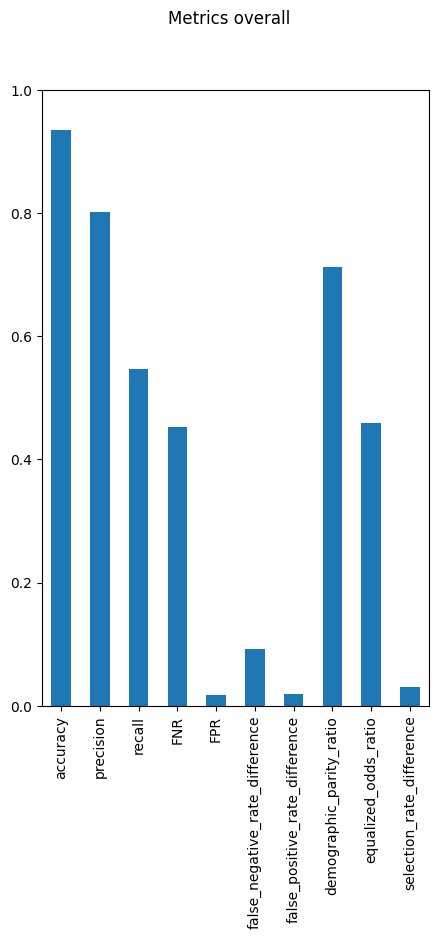

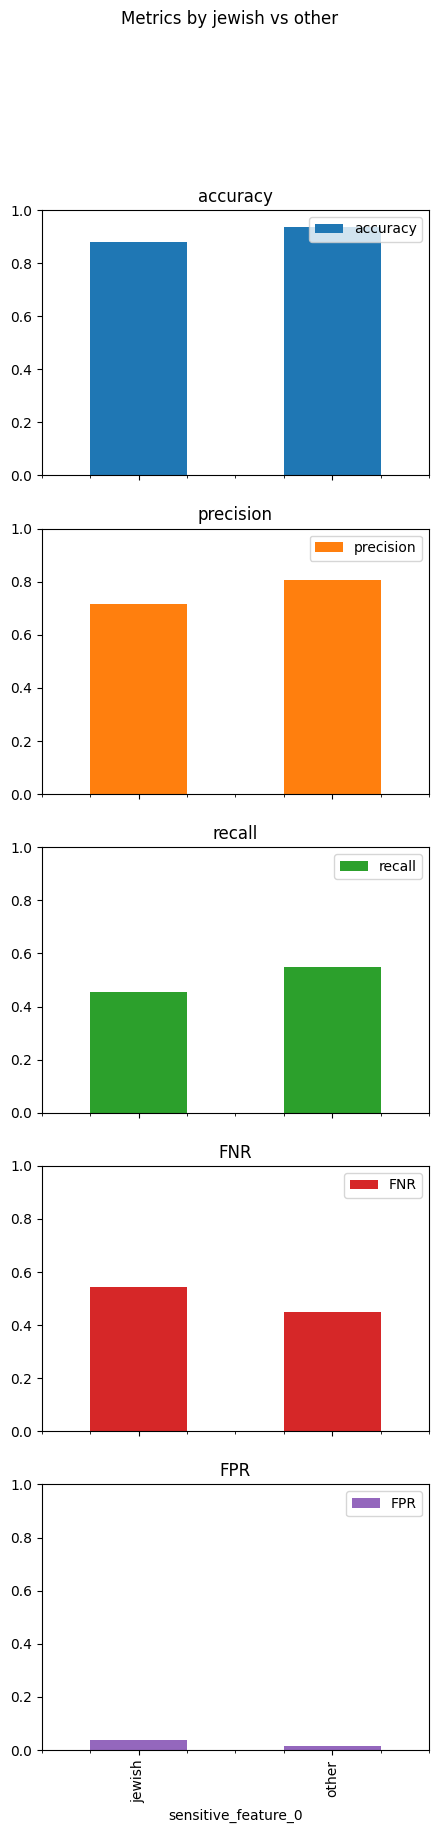

<ipython-input-23-d1f222872d97>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_religion_fairness = df_religion_fairness.append(fairness_metrics, ignore_index=True)


accuracy                          0.934710
precision                         0.802096
recall                            0.546754
FNR                               0.453246
FPR                               0.016846
false_negative_rate_difference    0.092926
false_positive_rate_difference    0.019377
demographic_parity_ratio          0.712410
equalized_odds_ratio              0.459773
selection_rate_difference         0.030309
dtype: float64
                     accuracy  precision    recall       FNR       FPR
sensitive_feature_0                                                   
jewish               0.880240   0.715909  0.456522  0.543478  0.035868
other                0.935792   0.804499  0.549448  0.450552  0.016491
----------------------------------------------------------------------------------------
muslim vs other


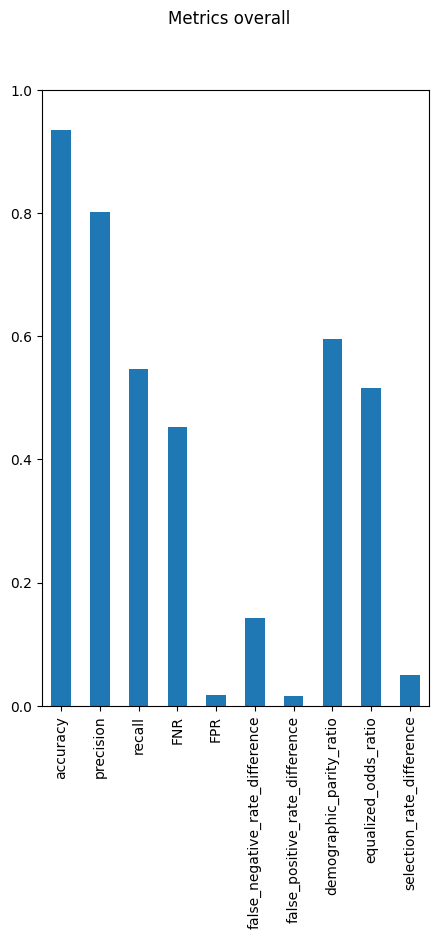

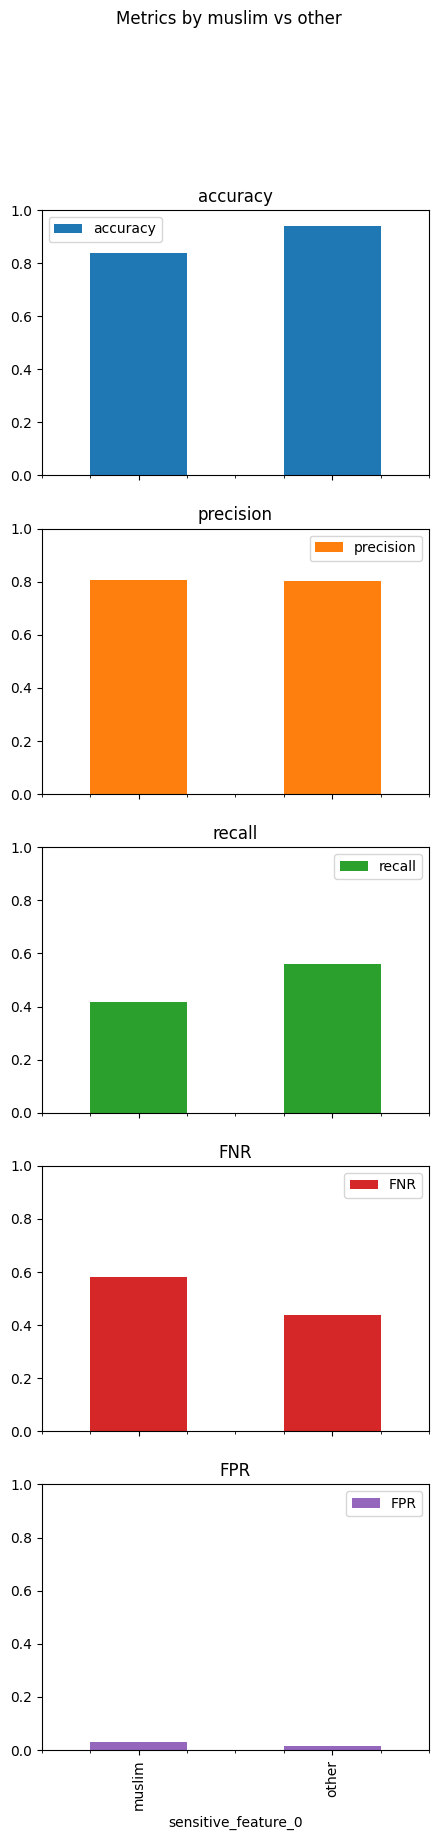

<ipython-input-23-d1f222872d97>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_religion_fairness = df_religion_fairness.append(fairness_metrics, ignore_index=True)


accuracy                          0.934710
precision                         0.802096
recall                            0.546754
FNR                               0.453246
FPR                               0.016846
false_negative_rate_difference    0.143053
false_positive_rate_difference    0.015248
demographic_parity_ratio          0.595777
equalized_odds_ratio              0.515481
selection_rate_difference         0.049735
dtype: float64
                     accuracy  precision    recall       FNR       FPR
sensitive_feature_0                                                   
muslim               0.838235   0.804781  0.418219  0.581781  0.031471
other                0.939530   0.801871  0.561272  0.438728  0.016223
----------------------------------------------------------------------------------------
hindu vs other


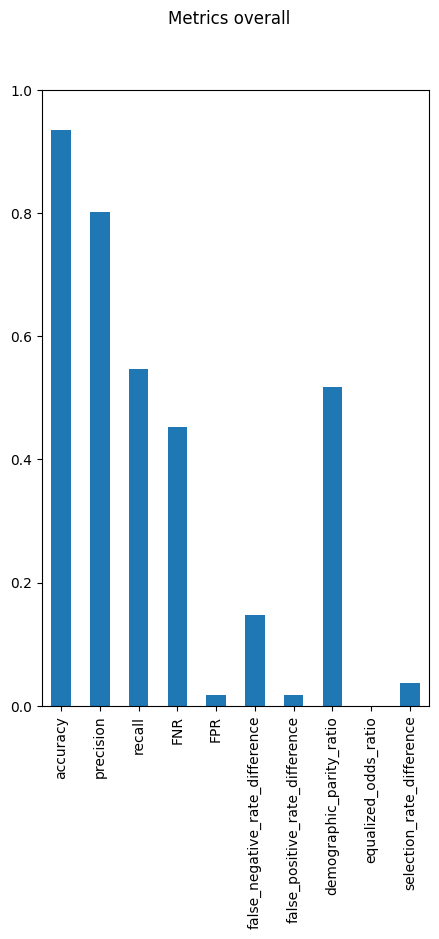

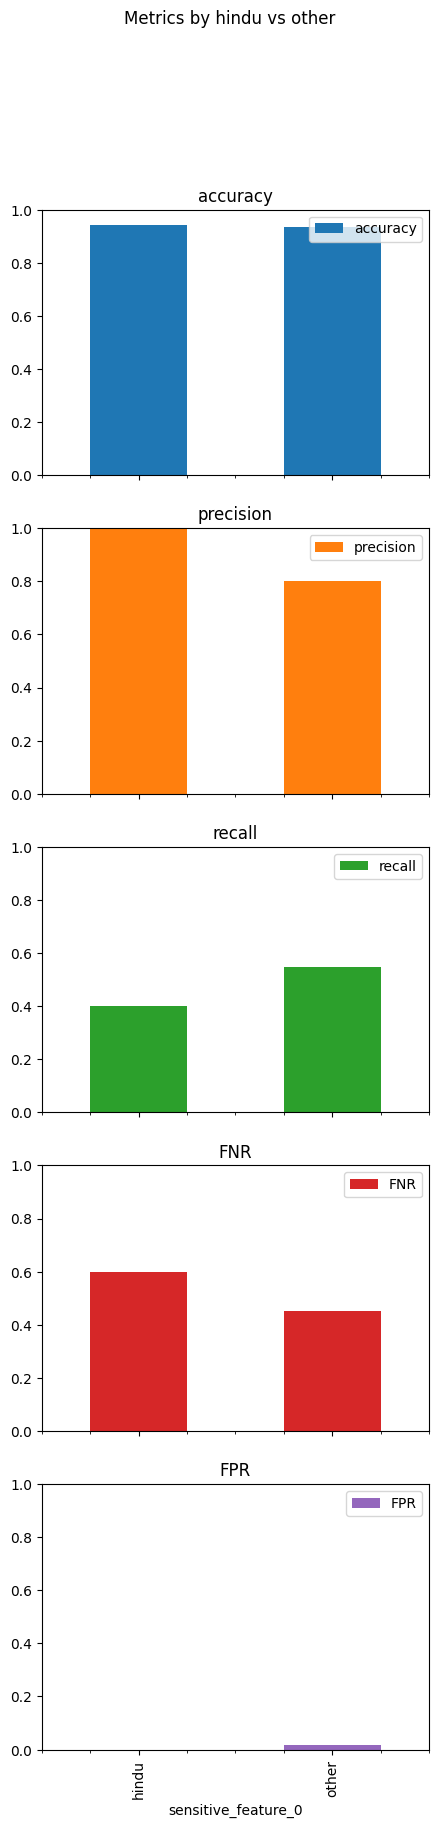

<ipython-input-23-d1f222872d97>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_religion_fairness = df_religion_fairness.append(fairness_metrics, ignore_index=True)


accuracy                          0.934710
precision                         0.802096
recall                            0.546754
FNR                               0.453246
FPR                               0.016846
false_negative_rate_difference    0.146908
false_positive_rate_difference    0.016866
demographic_parity_ratio          0.517945
equalized_odds_ratio              0.000000
selection_rate_difference         0.036498
dtype: float64
                     accuracy  precision    recall       FNR       FPR
sensitive_feature_0                                                   
hindu                0.941176   1.000000  0.400000  0.600000  0.000000
other                0.934702   0.801974  0.546908  0.453092  0.016866
----------------------------------------------------------------------------------------
buddhist vs other


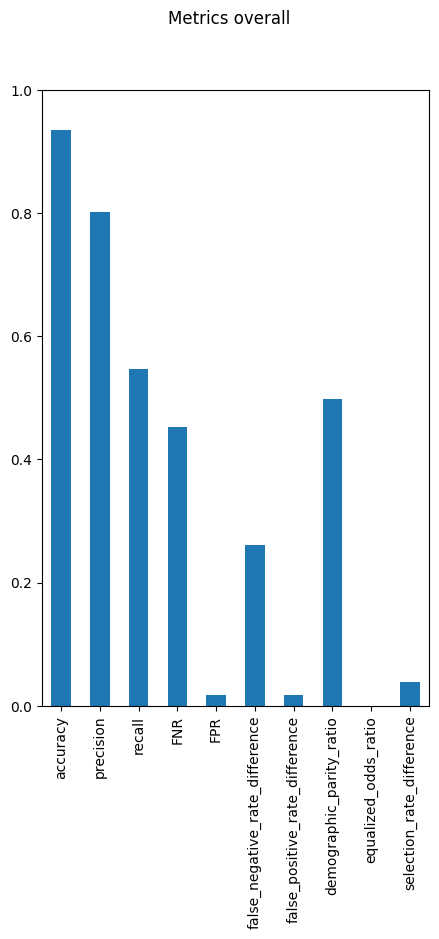

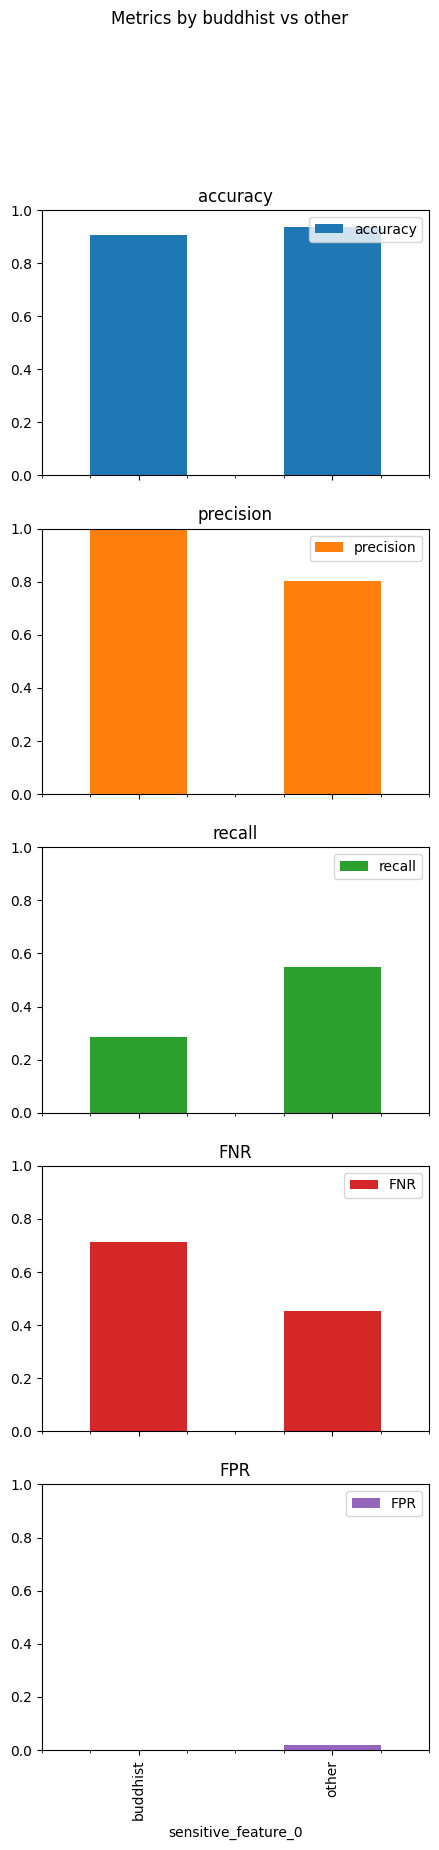

<ipython-input-23-d1f222872d97>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_religion_fairness = df_religion_fairness.append(fairness_metrics, ignore_index=True)


accuracy                          0.934710
precision                         0.802096
recall                            0.546754
FNR                               0.453246
FPR                               0.016846
false_negative_rate_difference    0.261424
false_positive_rate_difference    0.016866
demographic_parity_ratio          0.498376
equalized_odds_ratio              0.000000
selection_rate_difference         0.037982
dtype: float64
                     accuracy  precision    recall       FNR       FPR
sensitive_feature_0                                                   
buddhist             0.905660   1.000000  0.285714  0.714286  0.000000
other                0.934746   0.801974  0.547138  0.452862  0.016866
----------------------------------------------------------------------------------------
atheist vs other


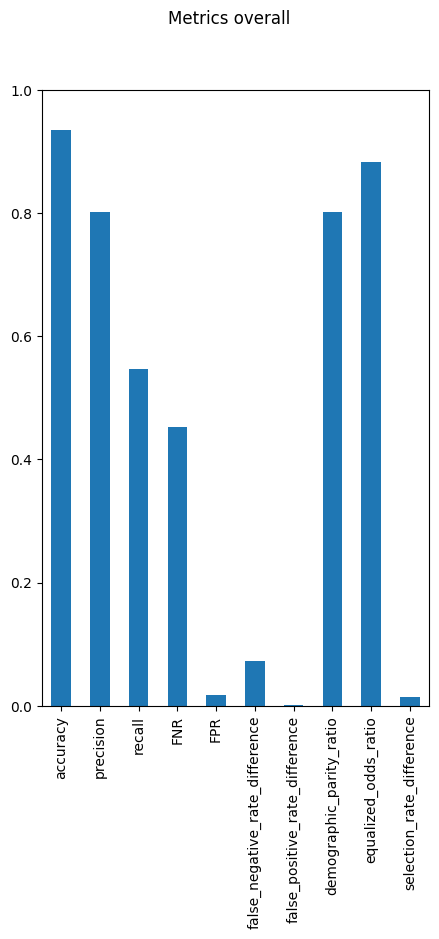

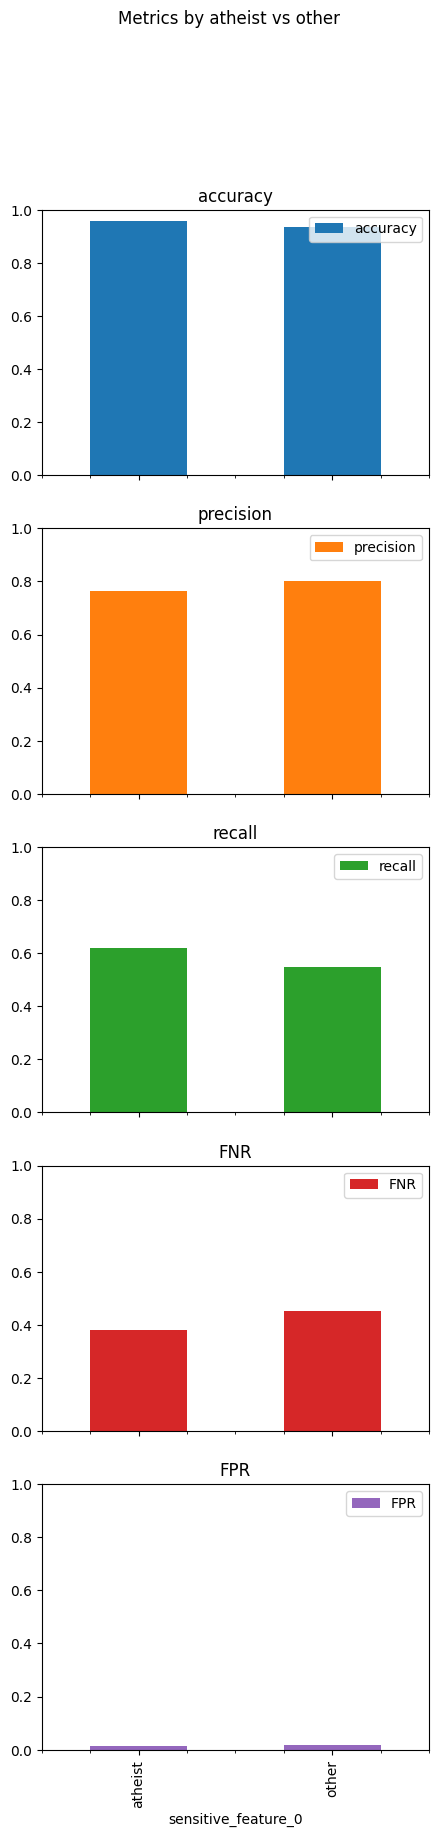

<ipython-input-23-d1f222872d97>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_religion_fairness = df_religion_fairness.append(fairness_metrics, ignore_index=True)


accuracy                          0.934710
precision                         0.802096
recall                            0.546754
FNR                               0.453246
FPR                               0.016846
false_negative_rate_difference    0.072615
false_positive_rate_difference    0.001411
demographic_parity_ratio          0.801308
equalized_odds_ratio              0.882700
selection_rate_difference         0.015055
dtype: float64
                     accuracy  precision    recall       FNR       FPR
sensitive_feature_0                                                   
atheist              0.957143   0.764706  0.619048  0.380952  0.015444
other                0.934562   0.802293  0.546433  0.453567  0.016855
----------------------------------------------------------------------------------------
other_religion vs other


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


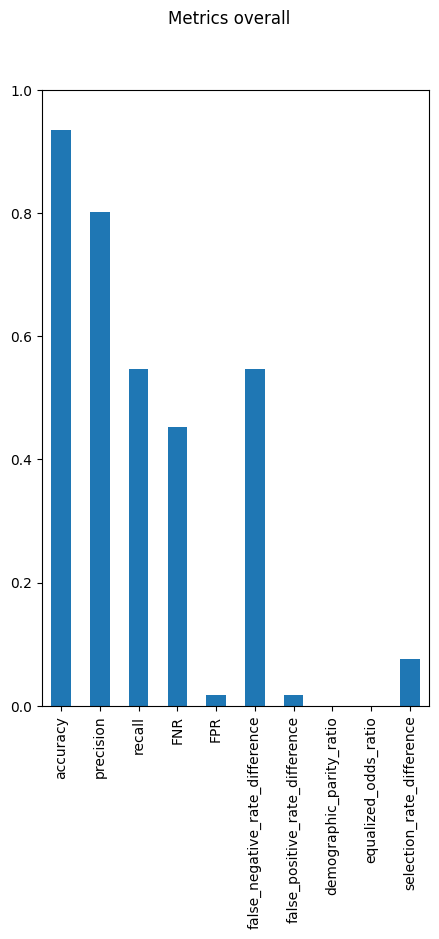

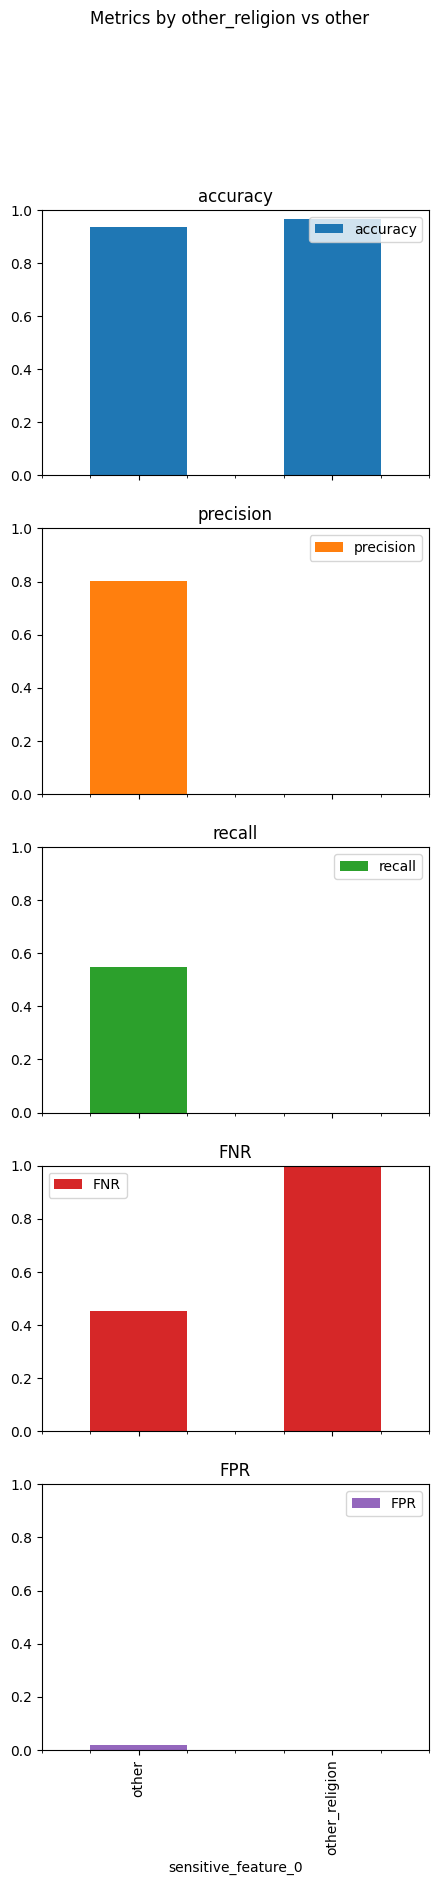

accuracy                          0.934710
precision                         0.802096
recall                            0.546754
FNR                               0.453246
FPR                               0.016846
false_negative_rate_difference    0.546868
false_positive_rate_difference    0.016858
demographic_parity_ratio          0.000000
equalized_odds_ratio              0.000000
selection_rate_difference         0.075722
dtype: float64
                     accuracy  precision    recall       FNR       FPR
sensitive_feature_0                                                   
other                0.934689   0.802096  0.546868  0.453132  0.016858
other_religion       0.965517   0.000000  0.000000  1.000000  0.000000
----------------------------------------------------------------------------------------


<ipython-input-23-d1f222872d97>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_religion_fairness = df_religion_fairness.append(fairness_metrics, ignore_index=True)


In [ ]:
religion = ['christian', 'jewish', 'muslim', 'hindu', 'buddhist', 'atheist', 'other_religion']
df_religion_counts = pd.DataFrame(columns=['counts'], index=['christian', 'jewish', 'muslim', 'hindu', 'buddhist', 'atheist', 'other_religion'])
df_religion_accuracy = pd.DataFrame(columns=["sensitive_feature_0", "accuracy", "precision", "recall", "FNR", "FPR"])
df_religion_fairness = pd.DataFrame(columns=["sensitive_feature", "false_negative_rate_difference", "false_positive_rate_difference", "demographic_parity_ratio", "equalized_odds_ratio", "selection_rate_difference"])

for e in religion:
  print('{} vs other'.format(e))
  feature_array = np.array([1 if x>= 0.5 else 0 for x in df_test[e]])
  df_religion_counts.loc[e, 'counts'] = str(sum(feature_array)) + '(' + str(round((sum(feature_array)/42870)*100, 2)) + '%)'
  sensitive_feature = [e if x==1 else 'other' for x in feature_array]

  metrics = {'accuracy': accuracy_score,
            'precision': precision_score, 
            'recall': recall_score,
            'FNR': false_negative_rate,
            'FPR': false_positive_rate, 
            'false_negative_rate_difference': false_negative_rate_difference, 
            'false_positive_rate_difference': false_positive_rate_difference,
            'demographic_parity_ratio': demographic_parity_ratio,
            'equalized_odds_ratio': equalized_odds_ratio,
            'selection_rate_difference': selection_rate_difference}

  extra_params = {
  'false_negative_rate_difference': {'sensitive_features': sensitive_feature},
  'false_positive_rate_difference': {'sensitive_features': sensitive_feature},
  'demographic_parity_ratio': {'sensitive_features': sensitive_feature},
  'equalized_odds_ratio': {'sensitive_features': sensitive_feature},
  'selection_rate_difference': {'sensitive_features': sensitive_feature}
  }

  grouped_on_e = MetricFrame(metrics=metrics,
                              y_true=y_true,
                              y_pred=y_pred,
                              sensitive_features=sensitive_feature,
                              sample_params=extra_params)

  grouped_on_e.overall.plot.bar(
      subplots=True, 
      figsize=(5, 8), 
      ylim=[0,1],
      title="Metrics overall",
      )
  plt.show()

  grouped_on_e.by_group[["accuracy", "precision", "recall", "FNR", "FPR"]].plot.bar(
      subplots=True, 
      figsize=(5, 20), 
      ylim=[0,1],
      title="Metrics by {} vs other".format(e),
      )
  plt.show()

  df = grouped_on_e.by_group[["accuracy", "precision", "recall", "FNR", "FPR"]]
  df = df.reset_index()
  df_religion_accuracy = pd.concat([df_religion_accuracy, df[df['sensitive_feature_0']==e]])

  fairness_metrics = {"sensitive_feature": e}
  for f in ["false_negative_rate_difference", "false_positive_rate_difference", "demographic_parity_ratio", "equalized_odds_ratio", "selection_rate_difference"]:
    fairness_metrics[f] = grouped_on_e.overall[f]

  df_religion_fairness = df_religion_fairness.append(fairness_metrics, ignore_index=True)

  print(grouped_on_e.overall)
  print(grouped_on_e.by_group[["accuracy", "precision", "recall", "FNR", "FPR"]])
  print('----------------------------------------------------------------------------------------')

In [ ]:
df_religion_counts

,counts
christian,4226(9.86%)
jewish,835(1.95%)
muslim,2040(4.76%)
hindu,51(0.12%)
buddhist,53(0.12%)
atheist,280(0.65%)
other_religion,29(0.07%)


In [ ]:
df_religion_accuracy.rename(columns={'sensitive_feature_0': 'sensitive_feature'})

,sensitive_feature,accuracy,precision,recall,FNR,FPR
0,christian,0.933507,0.809091,0.426859,0.573141,0.011027
0,jewish,0.880240,0.715909,0.456522,0.543478,0.035868
0,muslim,0.838235,0.804781,0.418219,0.581781,0.031471
0,hindu,0.941176,1.000000,0.400000,0.600000,0.000000
0,buddhist,0.905660,1.000000,0.285714,0.714286,0.000000
0,atheist,0.957143,0.764706,0.619048,0.380952,0.015444
1,other_religion,0.965517,0.000000,0.000000,1.000000,0.000000


In [ ]:
df_religion_fairness.rename(columns={'sensitive_feature_0': 'sensitive_feature', 'false_negative_rate_difference': 'FNR_difference', 'false_positive_rate_difference': 'FPR_difference'})

,sensitive_feature,FNR_difference,FPR_difference,demographic_parity_ratio,equalized_odds_ratio,selection_rate_difference
0,christian,0.131410,0.006465,0.665263,0.630386,0.026194
1,jewish,0.092926,0.019377,0.712410,0.459773,0.030309
2,muslim,0.143053,0.015248,0.595777,0.515481,0.049735
3,hindu,0.146908,0.016866,0.517945,0.000000,0.036498
4,buddhist,0.261424,0.016866,0.498376,0.000000,0.037982
5,atheist,0.072615,0.001411,0.801308,0.882700,0.015055
6,other_religion,0.546868,0.016858,0.000000,0.000000,0.075722


# Ethnicity

black vs other


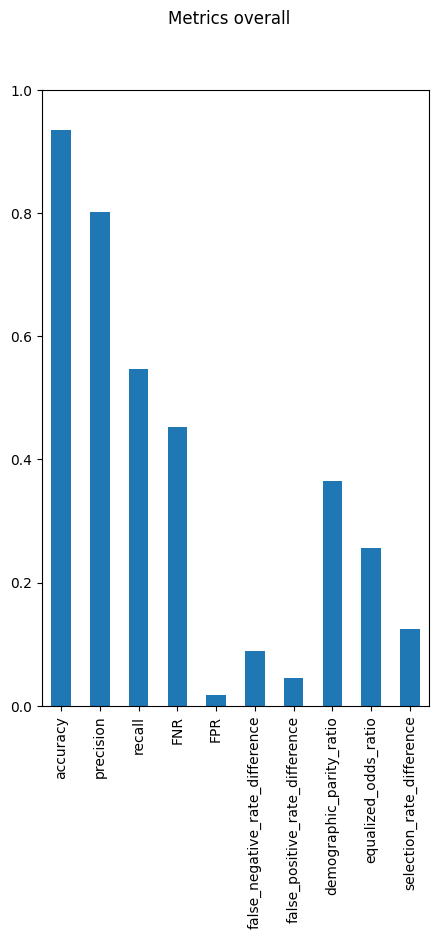

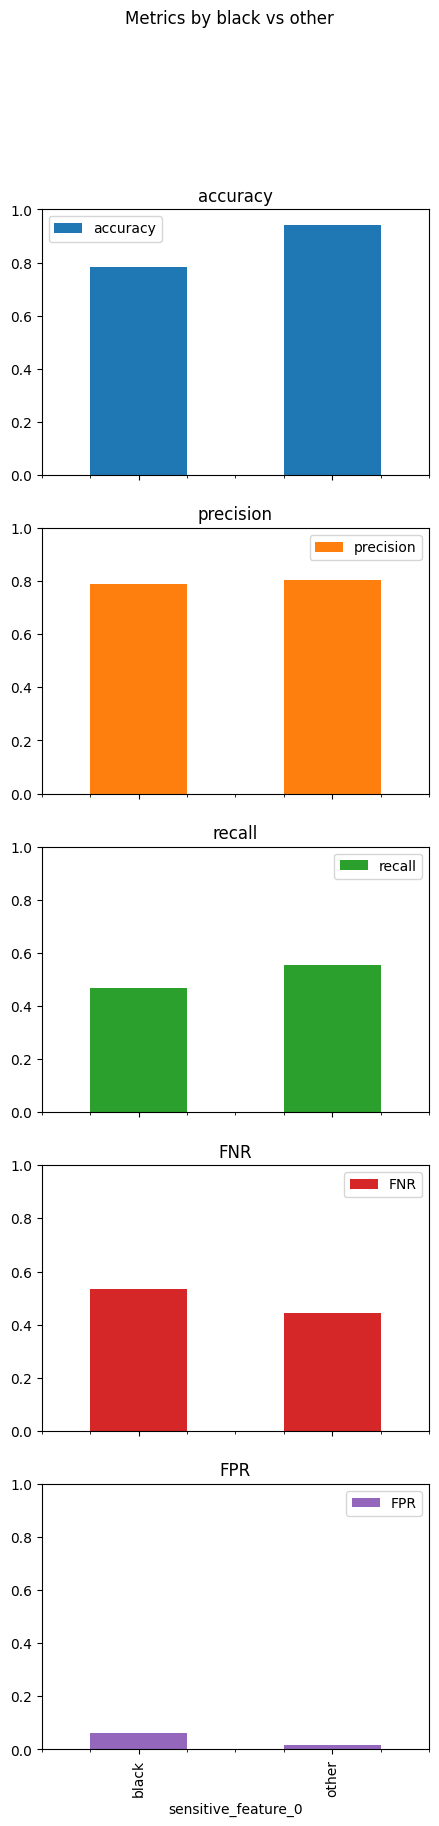

<ipython-input-25-dedee12db8e7>:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ethnicity_fairness = df_ethnicity_fairness.append(fairness_metrics, ignore_index=True)


accuracy                          0.934710
precision                         0.802096
recall                            0.546754
FNR                               0.453246
FPR                               0.016846
false_negative_rate_difference    0.088959
false_positive_rate_difference    0.045388
demographic_parity_ratio          0.364498
equalized_odds_ratio              0.256221
selection_rate_difference         0.124255
dtype: float64
                     accuracy  precision    recall       FNR       FPR
sensitive_feature_0                                                   
black                0.782752   0.791246  0.467197  0.532803  0.061024
other                0.940292   0.803190  0.556156  0.443844  0.015636
----------------------------------------------------------------------------------------
white vs other


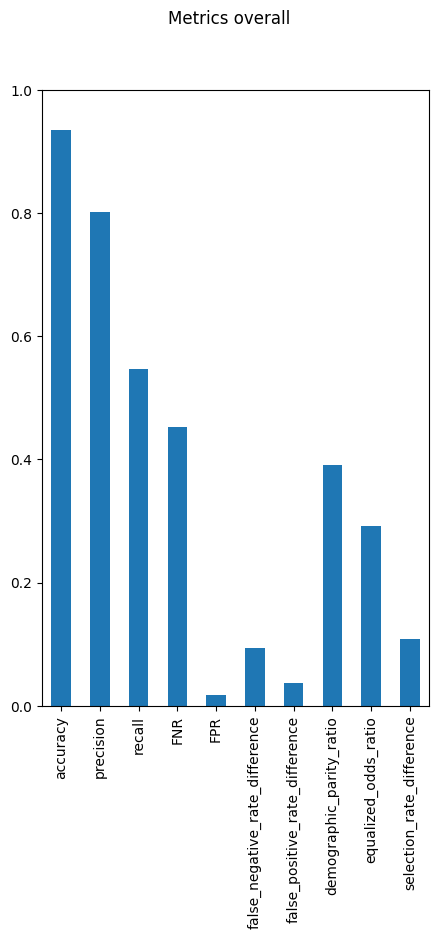

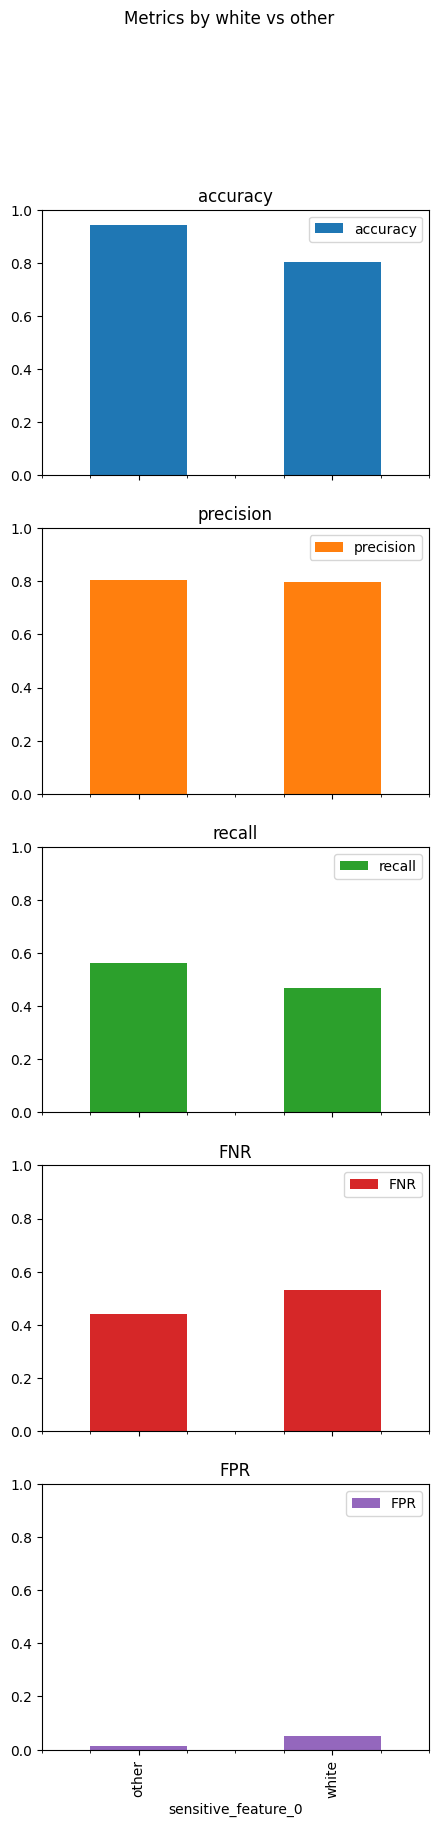

<ipython-input-25-dedee12db8e7>:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ethnicity_fairness = df_ethnicity_fairness.append(fairness_metrics, ignore_index=True)


accuracy                          0.934710
precision                         0.802096
recall                            0.546754
FNR                               0.453246
FPR                               0.016846
false_negative_rate_difference    0.093709
false_positive_rate_difference    0.036855
demographic_parity_ratio          0.390712
equalized_odds_ratio              0.291889
selection_rate_difference         0.108340
dtype: float64
                     accuracy  precision    recall       FNR       FPR
sensitive_feature_0                                                   
other                0.942724   0.803063  0.561364  0.438636  0.015192
white                0.802610   0.795872  0.467655  0.532345  0.052047
----------------------------------------------------------------------------------------
asian vs other


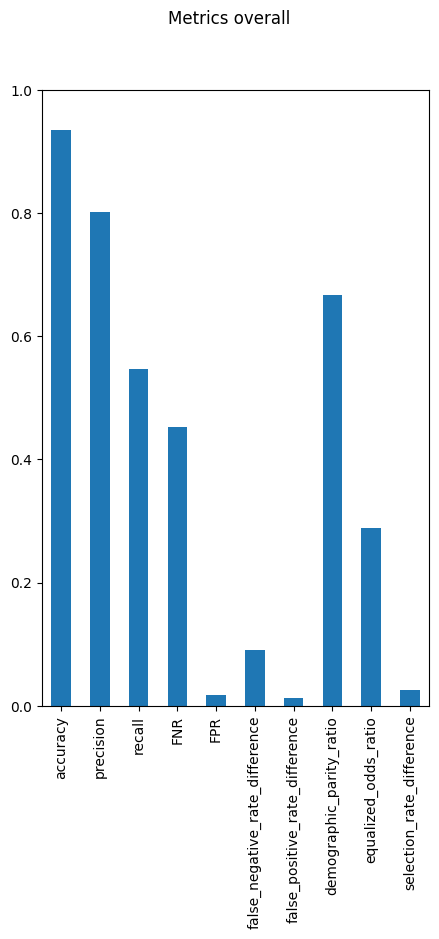

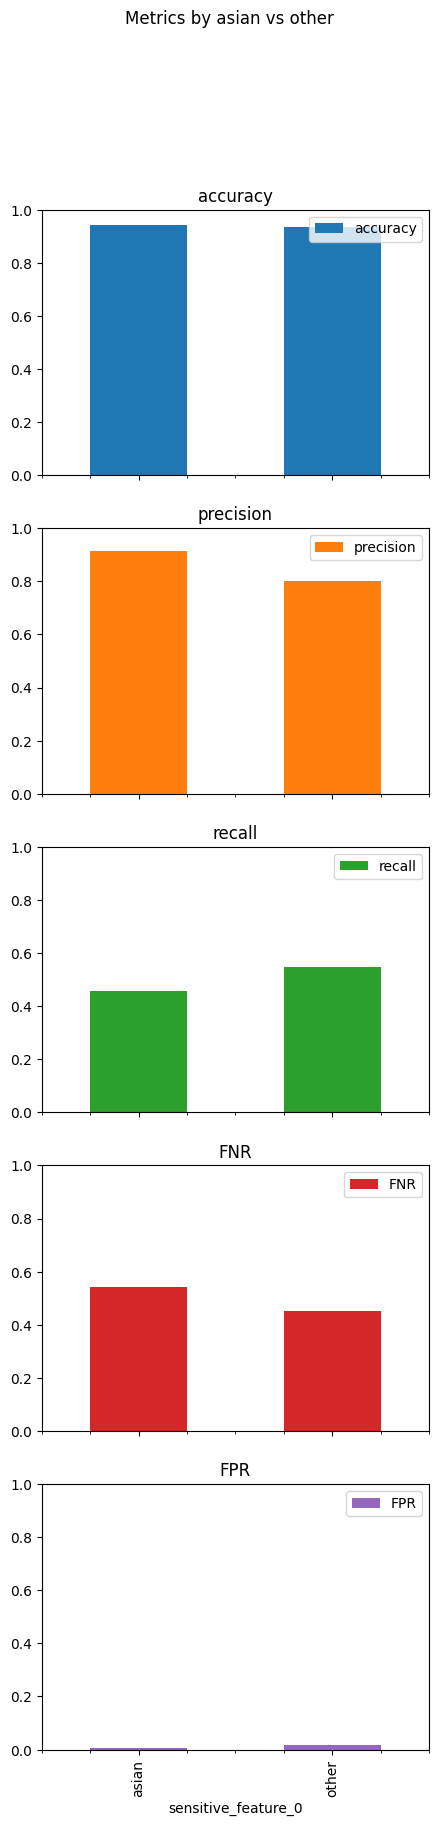

<ipython-input-25-dedee12db8e7>:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ethnicity_fairness = df_ethnicity_fairness.append(fairness_metrics, ignore_index=True)


accuracy                          0.934710
precision                         0.802096
recall                            0.546754
FNR                               0.453246
FPR                               0.016846
false_negative_rate_difference    0.091112
false_positive_rate_difference    0.012073
demographic_parity_ratio          0.667131
equalized_odds_ratio              0.288779
selection_rate_difference         0.025278
dtype: float64
                     accuracy  precision    recall       FNR       FPR
sensitive_feature_0                                                   
asian                0.940529   0.913043  0.456522  0.543478  0.004902
other                0.934647   0.801304  0.547634  0.452366  0.016975
----------------------------------------------------------------------------------------
latino vs other


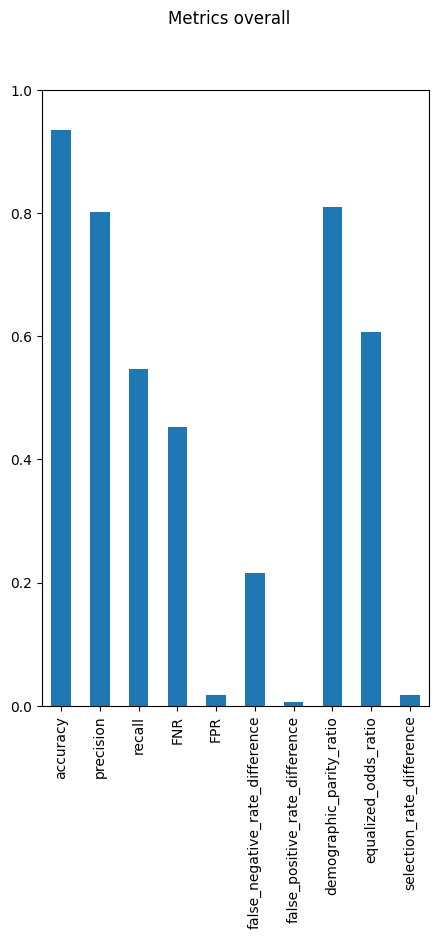

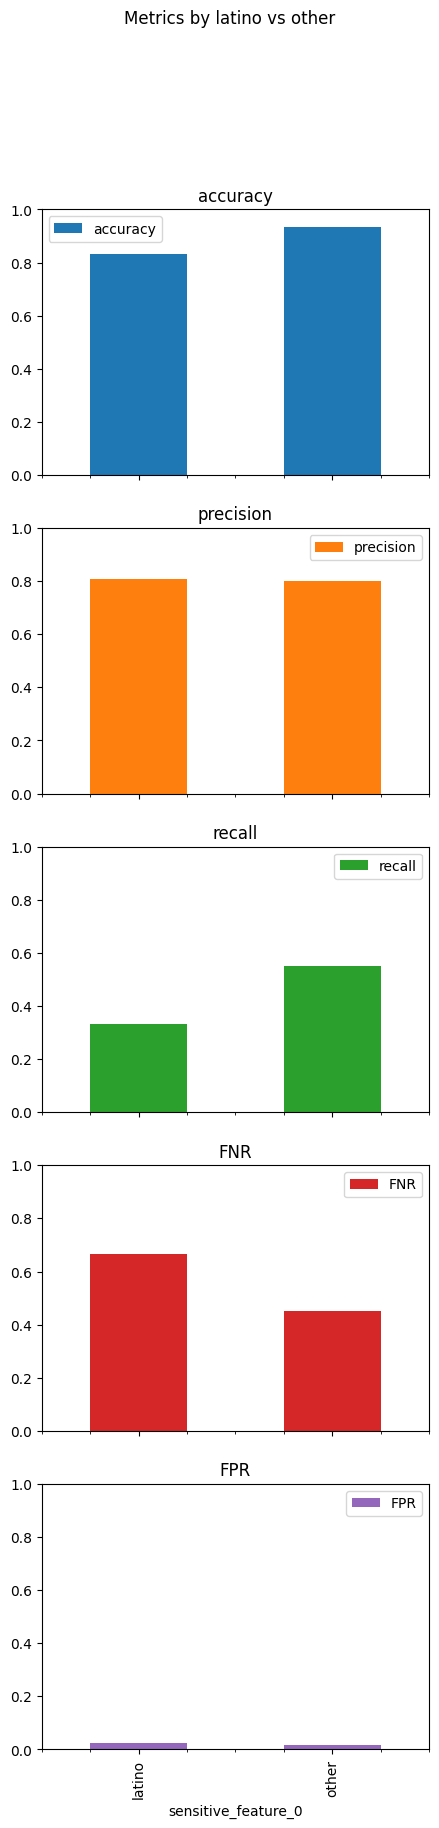

<ipython-input-25-dedee12db8e7>:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ethnicity_fairness = df_ethnicity_fairness.append(fairness_metrics, ignore_index=True)


accuracy                          0.934710
precision                         0.802096
recall                            0.546754
FNR                               0.453246
FPR                               0.016846
false_negative_rate_difference    0.215732
false_positive_rate_difference    0.006171
demographic_parity_ratio          0.809758
equalized_odds_ratio              0.607092
selection_rate_difference         0.017756
dtype: float64
                     accuracy  precision    recall       FNR       FPR
sensitive_feature_0                                                   
latino               0.831111   0.809524  0.333333  0.666667  0.022989
other                0.935256   0.802048  0.549065  0.450935  0.016817
----------------------------------------------------------------------------------------
other_race_or_ethnicity vs other


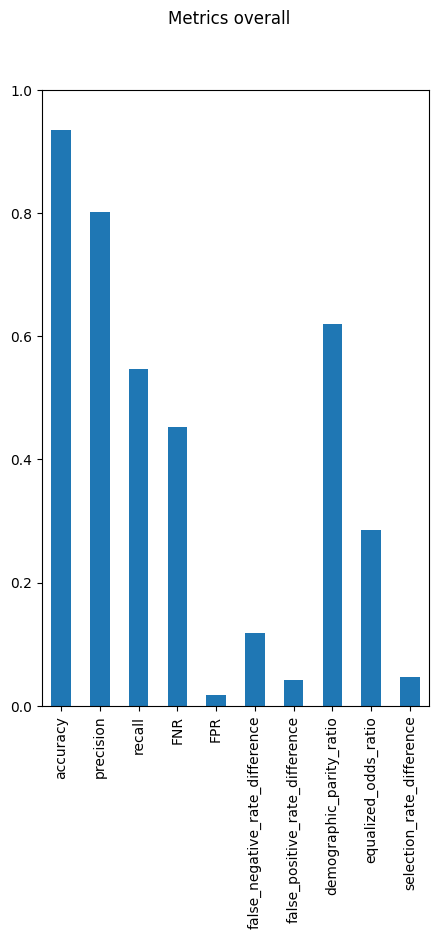

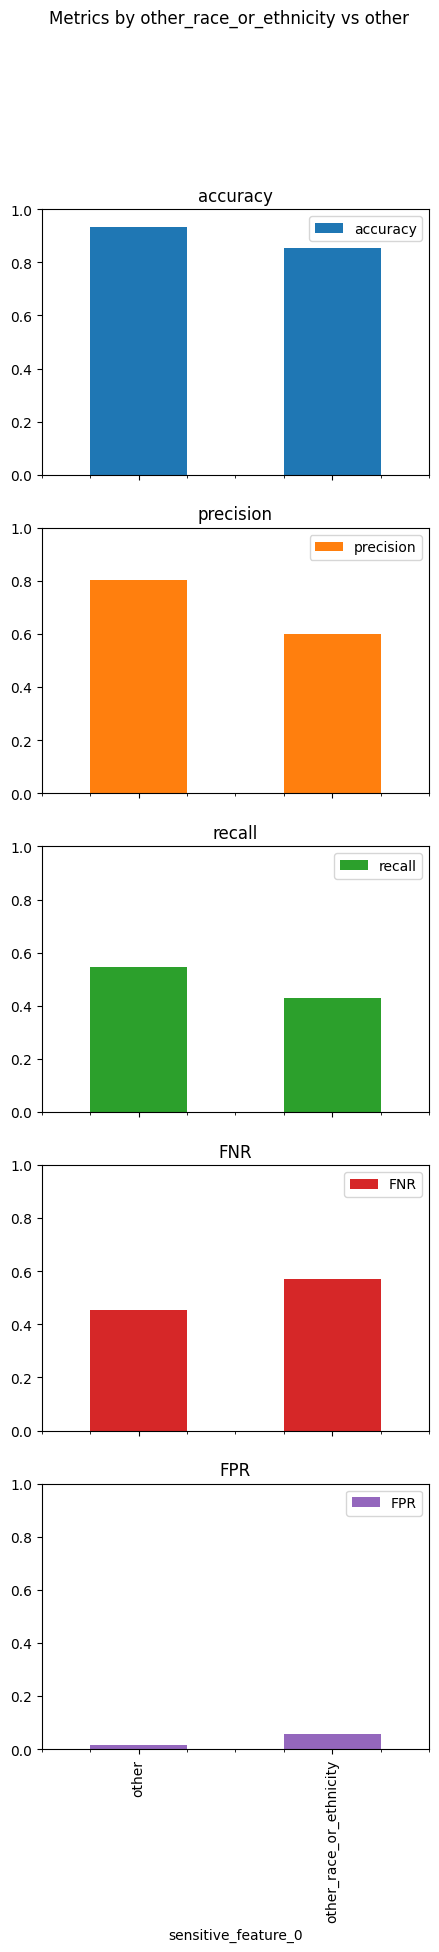

accuracy                          0.934710
precision                         0.802096
recall                            0.546754
FNR                               0.453246
FPR                               0.016846
false_negative_rate_difference    0.118356
false_positive_rate_difference    0.042015
demographic_parity_ratio          0.620136
equalized_odds_ratio              0.285737
selection_rate_difference         0.046325
dtype: float64
                         accuracy  precision    recall       FNR       FPR
sensitive_feature_0                                                       
other                    0.934787   0.802408  0.546928  0.453072  0.016808
other_race_or_ethnicity  0.853659   0.600000  0.428571  0.571429  0.058824
----------------------------------------------------------------------------------------


<ipython-input-25-dedee12db8e7>:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ethnicity_fairness = df_ethnicity_fairness.append(fairness_metrics, ignore_index=True)


In [ ]:
ethnicity = ['black', 'white', 'asian', 'latino', 'other_race_or_ethnicity']
df_ethnicity_counts = pd.DataFrame(columns=['counts'], index=['black', 'white', 'asian', 'latino', 'other_race_or_ethnicity'])
df_ethnicity_accuracy = pd.DataFrame(columns=["sensitive_feature_0", "accuracy", "precision", "recall", "FNR", "FPR"])
df_ethnicity_fairness = pd.DataFrame(columns=["sensitive_feature", "false_negative_rate_difference", "false_positive_rate_difference", "demographic_parity_ratio", "equalized_odds_ratio", "selection_rate_difference"])


for e in ethnicity:
  print('{} vs other'.format(e))
  feature_array = np.array([1 if x>= 0.5 else 0 for x in df_test[e]])
  df_ethnicity_counts.loc[e, 'counts'] = str(sum(feature_array)) + '(' + str(round((sum(feature_array)/42870)*100, 2)) + '%)'
  sensitive_feature = [e if x==1 else 'other' for x in feature_array]

  metrics = {'accuracy': accuracy_score,
            'precision': precision_score, 
            'recall': recall_score,
            'FNR': false_negative_rate,
            'FPR': false_positive_rate, 
            'false_negative_rate_difference': false_negative_rate_difference, 
            'false_positive_rate_difference': false_positive_rate_difference,
            'demographic_parity_ratio': demographic_parity_ratio,
            'equalized_odds_ratio': equalized_odds_ratio,
            'selection_rate_difference': selection_rate_difference}

  extra_params = {
  'false_negative_rate_difference': {'sensitive_features': sensitive_feature},
  'false_positive_rate_difference': {'sensitive_features': sensitive_feature},
  'demographic_parity_ratio': {'sensitive_features': sensitive_feature},
  'equalized_odds_ratio': {'sensitive_features': sensitive_feature},
  'selection_rate_difference': {'sensitive_features': sensitive_feature}
  }

  grouped_on_e = MetricFrame(metrics=metrics,
                              y_true=y_true,
                              y_pred=y_pred,
                              sensitive_features=sensitive_feature,
                              sample_params=extra_params)

  grouped_on_e.overall.plot.bar(
      subplots=True, 
      figsize=(5, 8), 
      ylim=[0,1],
      title="Metrics overall",
      )
  plt.show()

  grouped_on_e.by_group[["accuracy", "precision", "recall", "FNR", "FPR"]].plot.bar(
      subplots=True, 
      figsize=(5, 20), 
      ylim=[0,1],
      title="Metrics by {} vs other".format(e),
      )
  plt.show()

  df = grouped_on_e.by_group[["accuracy", "precision", "recall", "FNR", "FPR"]]
  df = df.reset_index()
  df_ethnicity_accuracy = pd.concat([df_ethnicity_accuracy, df[df['sensitive_feature_0']==e]])

  fairness_metrics = {"sensitive_feature": e}
  for f in ["false_negative_rate_difference", "false_positive_rate_difference", "demographic_parity_ratio", "equalized_odds_ratio", "selection_rate_difference"]:
    fairness_metrics[f] = grouped_on_e.overall[f]

  df_ethnicity_fairness = df_ethnicity_fairness.append(fairness_metrics, ignore_index=True)

  print(grouped_on_e.overall)
  print(grouped_on_e.by_group[["accuracy", "precision", "recall", "FNR", "FPR"]])
  print('----------------------------------------------------------------------------------------')

In [ ]:
df_ethnicity_counts

,counts
black,1519(3.54%)
white,2452(5.72%)
asian,454(1.06%)
latino,225(0.52%)
other_race_or_ethnicity,41(0.1%)


In [ ]:
df_ethnicity_accuracy.rename(columns={'sensitive_feature_0': 'sensitive_feature'})

,sensitive_feature,accuracy,precision,recall,FNR,FPR
0,black,0.782752,0.791246,0.467197,0.532803,0.061024
1,white,0.802610,0.795872,0.467655,0.532345,0.052047
0,asian,0.940529,0.913043,0.456522,0.543478,0.004902
0,latino,0.831111,0.809524,0.333333,0.666667,0.022989
1,other_race_or_ethnicity,0.853659,0.600000,0.428571,0.571429,0.058824


In [ ]:
df_ethnicity_fairness.rename(columns={'sensitive_feature_0': 'sensitive_feature', 'false_negative_rate_difference': 'FNR_difference', 'false_positive_rate_difference': 'FPR_difference'})

,sensitive_feature,FNR_difference,FPR_difference,demographic_parity_ratio,equalized_odds_ratio,selection_rate_difference
0,black,0.088959,0.045388,0.364498,0.256221,0.124255
1,white,0.093709,0.036855,0.390712,0.291889,0.108340
2,asian,0.091112,0.012073,0.667131,0.288779,0.025278
3,latino,0.215732,0.006171,0.809758,0.607092,0.017756
4,other_race_or_ethnicity,0.118356,0.042015,0.620136,0.285737,0.046325


# Disability

physical_disability                  42870 non-null   float64
 41  intellectual_or_learning_disability  42870 non-null   float64
 42  psychiatric_or_mental_illness        42870 non-null   float64
 43  other_disability 

physical_disability vs other


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


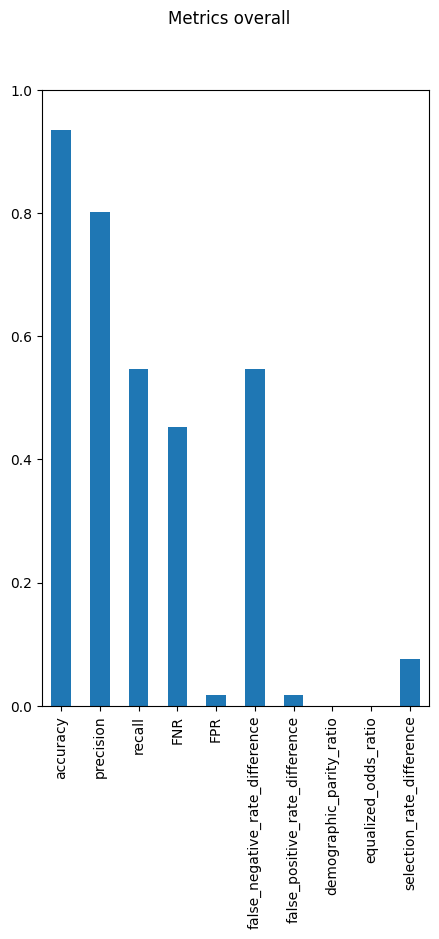

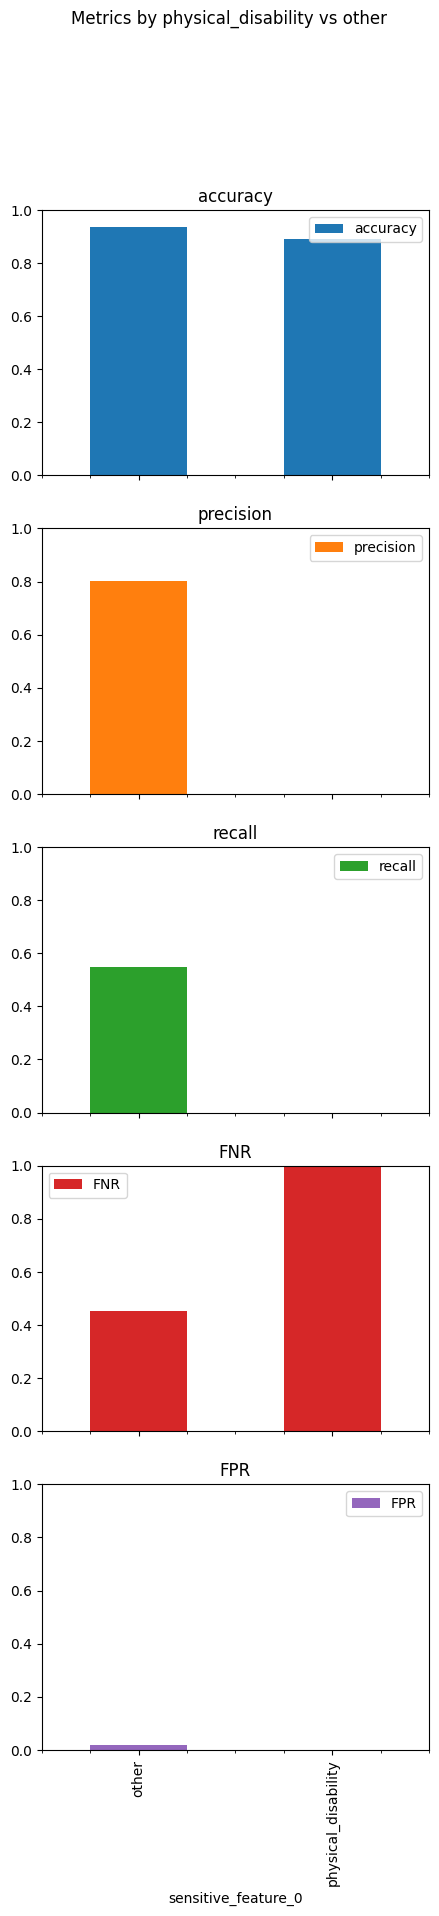

<ipython-input-27-9d43da717fd3>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_disability_fairness = df_disability_fairness.append(fairness_metrics, ignore_index=True)


accuracy                          0.934710
precision                         0.802096
recall                            0.546754
FNR                               0.453246
FPR                               0.016846
false_negative_rate_difference    0.546868
false_positive_rate_difference    0.016849
demographic_parity_ratio          0.000000
equalized_odds_ratio              0.000000
selection_rate_difference         0.075687
dtype: float64
                     accuracy  precision    recall       FNR       FPR
sensitive_feature_0                                                   
other                0.934719   0.802096  0.546868  0.453132  0.016849
physical_disability  0.888889   0.000000  0.000000  1.000000  0.000000
----------------------------------------------------------------------------------------
intellectual_or_learning_disability vs other


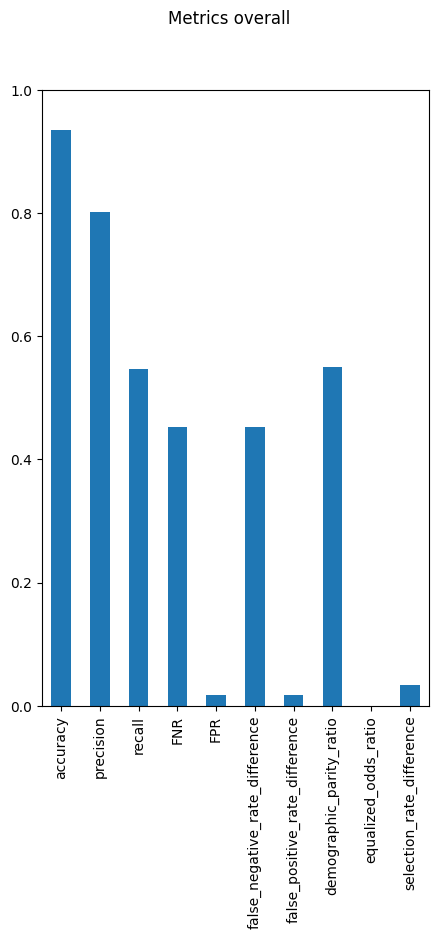

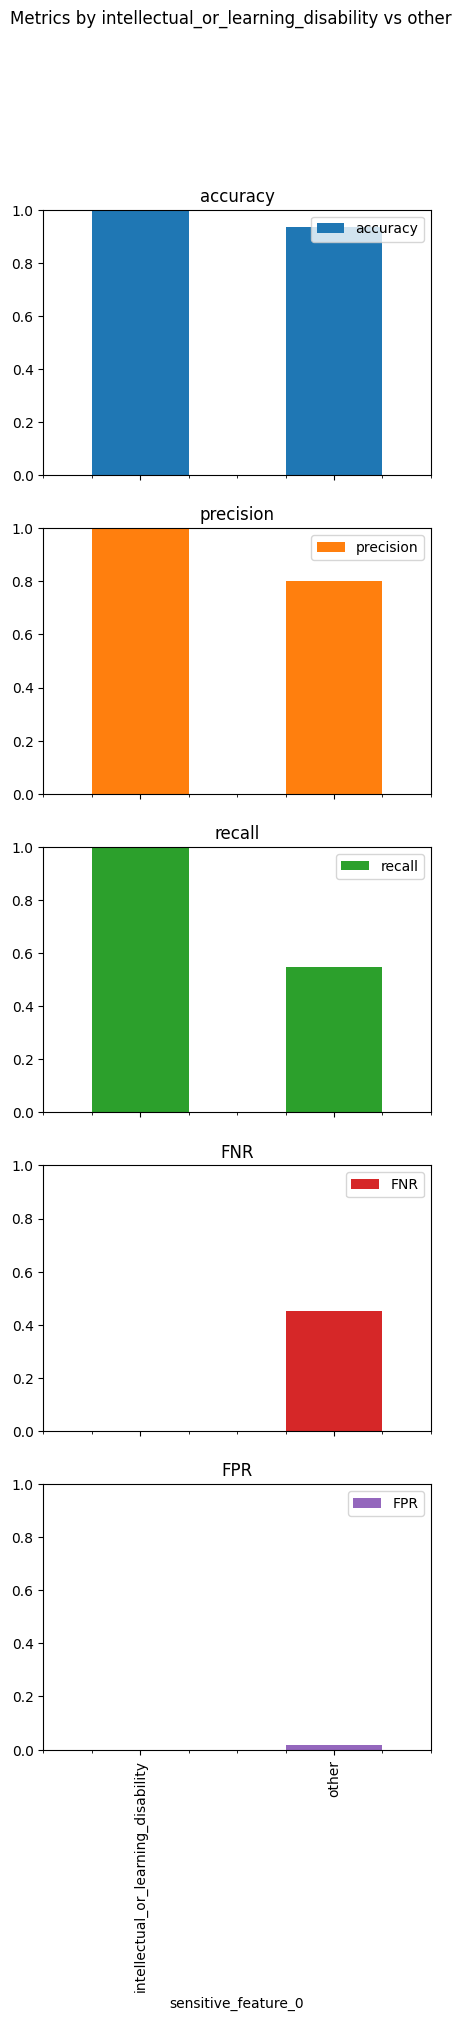

<ipython-input-27-9d43da717fd3>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_disability_fairness = df_disability_fairness.append(fairness_metrics, ignore_index=True)


accuracy                          0.934710
precision                         0.802096
recall                            0.546754
FNR                               0.453246
FPR                               0.016846
false_negative_rate_difference    0.453342
false_positive_rate_difference    0.016856
demographic_parity_ratio          0.550493
equalized_odds_ratio              0.000000
selection_rate_difference         0.034023
dtype: float64
                                     accuracy  precision    recall       FNR  \
sensitive_feature_0                                                            
intellectual_or_learning_disability  1.000000   1.000000  1.000000  0.000000   
other                                0.934673   0.802035  0.546658  0.453342   

                                          FPR  
sensitive_feature_0                            
intellectual_or_learning_disability  0.000000  
other                                0.016856  
------------------------------------------

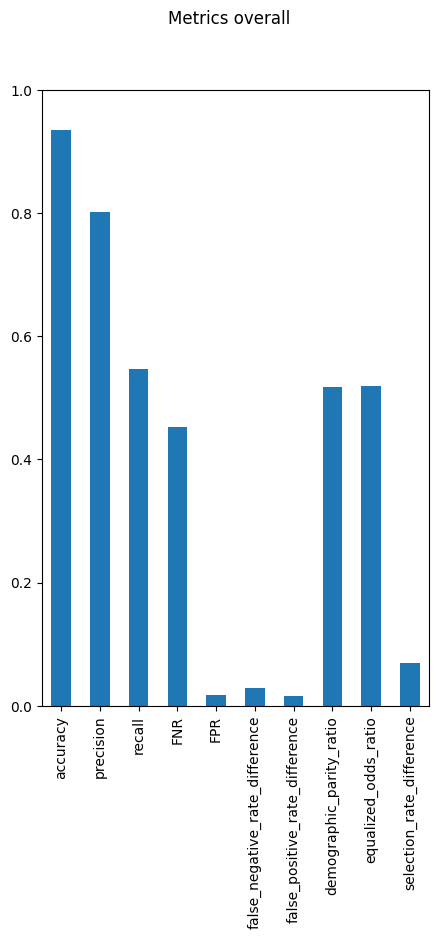

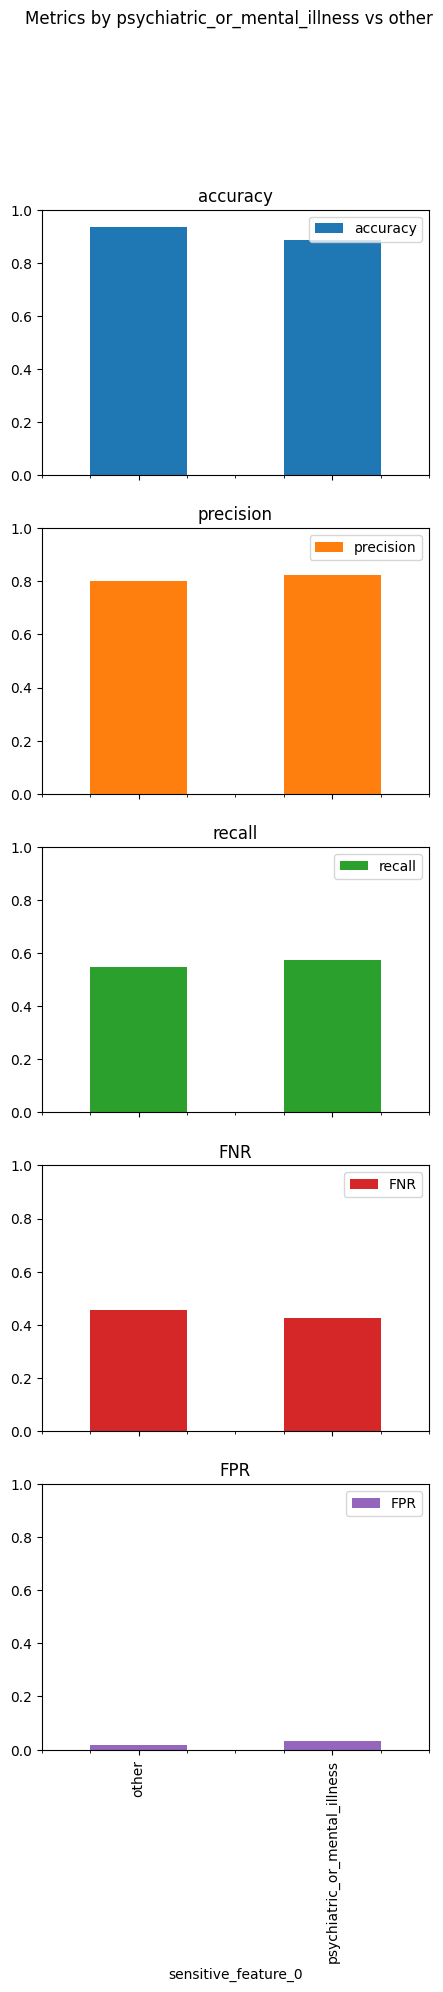

accuracy                          0.934710
precision                         0.802096
recall                            0.546754
FNR                               0.453246
FPR                               0.016846
false_negative_rate_difference    0.029372
false_positive_rate_difference    0.015417
demographic_parity_ratio          0.516776
equalized_odds_ratio              0.519699
selection_rate_difference         0.069978
dtype: float64
                               accuracy  precision    recall       FNR  \
sensitive_feature_0                                                      
other                          0.935291   0.801577  0.546099  0.453901   
psychiatric_or_mental_illness  0.886497   0.824324  0.575472  0.424528   

                                    FPR  
sensitive_feature_0                      
other                          0.016682  
psychiatric_or_mental_illness  0.032099  
----------------------------------------------------------------------------------------


<ipython-input-27-9d43da717fd3>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_disability_fairness = df_disability_fairness.append(fairness_metrics, ignore_index=True)


In [ ]:
# 'other_disability' count is 0
disability = ['physical_disability', 'intellectual_or_learning_disability', 'psychiatric_or_mental_illness']
df_disability_counts = pd.DataFrame(columns=['counts'], index=['physical_disability', 'intellectual_or_learning_disability', 'psychiatric_or_mental_illness'])
df_disability_accuracy = pd.DataFrame(columns=["sensitive_feature_0", "accuracy", "precision", "recall", "FNR", "FPR"])
df_disability_fairness = pd.DataFrame(columns=["sensitive_feature", "false_negative_rate_difference", "false_positive_rate_difference", "demographic_parity_ratio", "equalized_odds_ratio", "selection_rate_difference"])


for e in disability:
  print('{} vs other'.format(e))
  feature_array = np.array([1 if x>= 0.5 else 0 for x in df_test[e]])
  df_disability_counts.loc[e, 'counts'] = str(sum(feature_array)) + '(' + str(round((sum(feature_array)/42870)*100, 2)) + '%)'
  sensitive_feature = [e if x==1 else 'other' for x in feature_array]

  metrics = {'accuracy': accuracy_score,
            'precision': precision_score, 
            'recall': recall_score,
            'FNR': false_negative_rate,
            'FPR': false_positive_rate, 
            'false_negative_rate_difference': false_negative_rate_difference, 
            'false_positive_rate_difference': false_positive_rate_difference,
            'demographic_parity_ratio': demographic_parity_ratio,
            'equalized_odds_ratio': equalized_odds_ratio,
            'selection_rate_difference': selection_rate_difference}

  extra_params = {
  'false_negative_rate_difference': {'sensitive_features': sensitive_feature},
  'false_positive_rate_difference': {'sensitive_features': sensitive_feature},
  'demographic_parity_ratio': {'sensitive_features': sensitive_feature},
  'equalized_odds_ratio': {'sensitive_features': sensitive_feature},
  'selection_rate_difference': {'sensitive_features': sensitive_feature}
  }

  grouped_on_e = MetricFrame(metrics=metrics,
                              y_true=y_true,
                              y_pred=y_pred,
                              sensitive_features=sensitive_feature,
                              sample_params=extra_params)

  grouped_on_e.overall.plot.bar(
      subplots=True, 
      figsize=(5, 8), 
      ylim=[0,1],
      title="Metrics overall",
      )
  plt.show()

  grouped_on_e.by_group[["accuracy", "precision", "recall", "FNR", "FPR"]].plot.bar(
      subplots=True, 
      figsize=(5, 20), 
      ylim=[0,1],
      title="Metrics by {} vs other".format(e),
      )
  plt.show()

  df = grouped_on_e.by_group[["accuracy", "precision", "recall", "FNR", "FPR"]]
  df = df.reset_index()
  df_disability_accuracy = pd.concat([df_disability_accuracy, df[df['sensitive_feature_0']==e]])

  fairness_metrics = {"sensitive_feature": e}
  for f in ["false_negative_rate_difference", "false_positive_rate_difference", "demographic_parity_ratio", "equalized_odds_ratio", "selection_rate_difference"]:
    fairness_metrics[f] = grouped_on_e.overall[f]

  df_disability_fairness = df_disability_fairness.append(fairness_metrics, ignore_index=True)

  print(grouped_on_e.overall)
  print(grouped_on_e.by_group[["accuracy", "precision", "recall", "FNR", "FPR"]])
  print('----------------------------------------------------------------------------------------')

In [ ]:
df_disability_counts.loc['other_disability', 'counts'] = '0(0.00%)'
df_disability_counts

,counts
physical_disability,9(0.02%)
intellectual_or_learning_disability,24(0.06%)
psychiatric_or_mental_illness,511(1.19%)
other_disability,0(0.00%)


In [ ]:
df_disability_accuracy.rename(columns={'sensitive_feature_0': 'sensitive_feature'})

,sensitive_feature,accuracy,precision,recall,FNR,FPR
1,physical_disability,0.888889,0.000000,0.000000,1.000000,0.000000
0,intellectual_or_learning_disability,1.000000,1.000000,1.000000,0.000000,0.000000
1,psychiatric_or_mental_illness,0.886497,0.824324,0.575472,0.424528,0.032099


In [ ]:
df_disability_fairness.rename(columns={'sensitive_feature_0': 'sensitive_feature', 'false_negative_rate_difference': 'FNR_difference', 'false_positive_rate_difference': 'FPR_difference'})

,sensitive_feature,FNR_difference,FPR_difference,demographic_parity_ratio,equalized_odds_ratio,selection_rate_difference
0,physical_disability,0.546868,0.016849,0.000000,0.000000,0.075687
1,intellectual_or_learning_disability,0.453342,0.016856,0.550493,0.000000,0.034023
2,psychiatric_or_mental_illness,0.029372,0.015417,0.516776,0.519699,0.069978
